In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import das Bibliotecas
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import ast
import json
import nltk
import numpy as np
import gensim
from pprint import pprint
nltk.download('punkt')
nltk.download('stopwords')
import seaborn as sns
from string import punctuation
from nltk import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import gensim.corpora as corpora
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from gensim.models import CoherenceModel
from sklearn.decomposition import TruncatedSVD

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Leitura do novo Dataset após tratamento inicial
url = 'https://raw.githubusercontent.com/leonardoemerson/Fake-Dataset/main/dataset/treated_dataset3.csv'
df = pd.read_csv(url, encoding = 'utf8', delimiter = ';', header = 0)

In [ ]:
#Eliminando coluna 'Unnamed: 0'
df = df.drop("Unnamed: 0",axis=1)

In [ ]:
df.shape

(5201, 16)

In [ ]:
#Visualização inicial do Dataset
df.head()

,title,title_norm,message,message_norm,tokens,features,entities,type,source,url_review,message_norm_treatment,datetime,message_norm_treatment_ssw,message_norm_treatment_ssw2,features2,category
0,"Pastor Sérgio Von Helder, que chutou santa, nã...","pastor sergio von helder, que chutou santa, na...",NaN,NaN,"['pastor', 'sergio', 'von', 'helder', 'que', '...","{'len': 12, 1: {'token': 'pastor', 'lemma': 'p...",[Pastor Sérgio Von Helder],fake,boatos.org,https://www.boatos.org/religiao/pastor-sergio-...,NaN,2013-08-07T19:27:23-03:00,[],[],"{'len': 12, 1: {'token': 'pastor', 'lemma': 'p...",Religião
1,"Lulinha, filho de Lula, comprou avião Gulfstre...","lulinha, filho de lula, comprou aviao gulfstre...",NaN,NaN,"['lulinha', 'filho', 'de', 'lula', 'comprou', ...","{'len': 14, 1: {'token': 'lulinha', 'lemma': '...","[Lula, Gulfstream]",fake,boatos.org,https://www.boatos.org/politica/lulinha-aviao-...,NaN,2013-08-02T19:56:26-03:00,[],[],"{'len': 14, 1: {'token': 'lulinha', 'lemma': '...",Política
2,Lulinha não comprou Fazenda Fortaleza por 47 m...,lulinha nao comprou fazenda fortaleza por 47 m...,O Novo Mega Campeão do Brasil de enriqueciment...,o novo mega campeao do brasil de enriqueciment...,"['lulinha', 'nao', 'comprou', 'fazenda', 'fort...","{'len': 8, 1: {'token': 'lulinha', 'lemma': 'l...","[Lulinha, Fazenda]",fake,boatos.org,https://www.boatos.org/politica/lulinha-fazend...,o novo mega campeao do brasil de enriqueciment...,2013-07-29T14:13:21-03:00,"['novo', 'mega', 'campeao', 'brasil', 'enrique...","['novo', 'mega', 'campeao', 'brasil', 'enrique...","{'len': 8, 1: {'token': 'lulinha', 'lemma': 'l...",Política
3,Fanta Uva causa câncer e problema nos rins,fanta uva causa cancer e problema nos rins,ALERTA GERAL ATENÇÃO” FANTA UVA!!!! A propagan...,alerta geral atencao fanta uva!!!!a propaganda...,"['fanta', 'uva', 'causa', 'cancer', 'e', 'prob...","{'len': 8, 1: {'token': 'fanta', 'lemma': 'fan...",[Fanta Uva],fake,boatos.org,https://www.boatos.org/saude/fanta-uva-da-canc...,alerta geral atencao fanta uva!!!!a propaganda...,2013-07-22T04:44:40-03:00,"['alerta', 'geral', 'atencao', 'fanta', 'uva',...","['alerta', 'geral', 'atencao', 'fanta', 'propa...","{'len': 8, 1: {'token': 'fanta', 'lemma': 'fan...",Saúde
4,Simpsons terá episódio sobre manifestações no ...,simpsons tera episodio sobre manifestacoes no ...,NaN,NaN,"['simpsons', 'tera', 'episodio', 'sobre', 'man...","{'len': 7, 1: {'token': 'simpsons', 'lemma': '...","[Simpsons, Brasil]",fake,boatos.org,https://www.boatos.org/entretenimento/simpsons...,NaN,2013-07-08T17:37:40-03:00,[],[],"{'len': 7, 1: {'token': 'simpsons', 'lemma': '...",Entretenimento


In [ ]:
#Ordenando dataset de acordo com a coluna 'datetime'
df = df.sort_values(by='datetime')

In [ ]:
#Resetando os índices do dataset
df = df.reset_index(drop=True)

###COLOCANDO TÍTULO COMO TEXTO PARA NOTÍCIAS SEM TEXTO

In [ ]:
from urllib.request import urlopen
advanced_sw_list = []
file = open("filename","w", encoding='utf-8')
url = urlopen("https://gist.githubusercontent.com/alopes/5358189/raw/2107d809cca6b83ce3d8e04dbd9463283025284f/stopwords.txt")
for line in url:
    file.write(str(line) +'\n')
    advanced_sw_list.append(line)
file.close()

In [ ]:
#Removendo espaços e \n dos elementos da lista avançada de strings(stopwords)
advanced_sw_list1 = list(map(lambda x:x.strip(),advanced_sw_list))

In [ ]:
#Decode para remover o b frente das strings(stopwords) 
for i in range(0, len(advanced_sw_list1)):
    advanced_sw_list1[i] = advanced_sw_list1[i].decode('utf-8')

In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 8.3 MB/s eta 0:00:00


In [ ]:
#Removendo acentuação das strings(stopwords)
import unidecode 
for i in range(0, len(advanced_sw_list1)):
    advanced_sw_list1[i] = unidecode.unidecode(advanced_sw_list1[i])

In [ ]:
#Adicionando novas stopwords manualmente
advanced_sw_list1.append('ai')
advanced_sw_list1.append('sobre')
advanced_sw_list1.append('r')
advanced_sw_list1.append('pra')
advanced_sw_list1.append('entao')
advanced_sw_list1.append('ta')
advanced_sw_list1.append('porque')
advanced_sw_list1.append('assim')
advanced_sw_list1.append('onde')
advanced_sw_list1.append('aqui')
advanced_sw_list1.append('agora')
advanced_sw_list1.append('vai')
advanced_sw_list1.append('ainda')
advanced_sw_list1.append('vamos')
advanced_sw_list1.append('diz')
advanced_sw_list1.append('pode')
advanced_sw_list1.append('sendo')
advanced_sw_list1.append('entao')
advanced_sw_list1.append('aqui')
advanced_sw_list1.append('1')

In [ ]:
#Mais stopwords
mais_stopwords = "a, agora, ainda, alguém, algum, alguma, algumas, alguns, ampla, amplas, amplo, amplos, ante, antes, ao, aos, após, aquela, aquelas, aquele, aqueles, aquilo, as, até, através, cada, coisa, coisas, com, como, contra, contudo, da, daquele, daqueles, das, de, dela, delas, dele, deles, depois, dessa, dessas, desse, desses, desta, destas, deste, deste, destes, deve, devem, devendo, dever, deverá, deverão, deveria, deveriam, devia, deviam, disse, disso, disto, dito, diz, dizem, do, dos, e, é, ela, elas, ele, eles, em, enquanto, entre, era, essa, essas, esse, esses, esta, está, estamos, estão, estas, estava, estavam, estávamos, este, estes, estou, eu, fazendo, fazer, feita, feitas, feito, feitos, foi, for, foram, fosse, fossem, grande, grandes, há, isso, isto, já, la, lá, lhe, lhes, lo, mas, me, mesma, mesmas, mesmo, mesmos, meu, meus, minha, minhas, muita, muitas, muito, muitos, na, não, nas, nem, nenhum, nessa, nessas, nesta, nestas, ninguém, no, nos, nós, nossa, nossas, nosso, nossos, num, numa, nunca, o, os, ou, outra, outras, outro, outros, para, pela, pelas, pelo, pelos, pequena, pequenas, pequeno, pequenos, per, perante, pode, pude, podendo, poder, poderia, poderiam, podia, podiam, pois, por, porém, porque, posso, pouca, poucas, pouco, poucos, primeiro, primeiros, própria, próprias, próprio, próprios, quais, qual, quando, quanto, quantos, que, quem, são, se, seja, sejam, sem, sempre, sendo, será, serão, seu, seus, si, sido, só, sob, sobre, sua, suas, talvez, também, tampouco, te, tem, tendo, tenha, ter, teu, teus, ti, tido, tinha, tinham, toda, todas, todavia, todo, todos, tu, tua, tuas, tudo, última, últimas, último, últimos, um, uma, umas, uns, vendo, ver, vez, vindo, vir, vos, vós"
mais_stopwords1 = [ 'a', 'à', 'adeus', 'agora', 'aí', 'ainda', 'além', 'algo', 'alguém', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'após', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'área', 'as', 'às', 'assim', 'até', 'atrás', 'através', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cá', 'cada', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contra', 'contudo', 'custa', 'da', 'dá', 'dão', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devendo', 'dever', 'deverá', 'deverão', 'deveria', 'deveriam', 'devia', 'deviam', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'disse', 'disso', 'disto', 'dito', 'diz', 'dizem', 'dizer', 'do', 'dois', 'dos', 'doze', 'duas', 'dúvida', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'embora', 'enquanto', 'entre', 'era', 'eram', 'éramos', 'és', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estás', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou', 'etc', 'eu', 'exemplo', 'faço', 'falta', 'favor', 'faz', 'fazeis', 'fazem', 'fazemos', 'fazendo', 'fazer', 'fazes', 'feita', 'feitas', 'feito', 'feitos', 'fez', 'fim', 'final', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'forma', 'formos', 'fosse', 'fossem', 'fôssemos', 'foste', 'fostes', 'fui', 'geral', 'grande', 'grandes', 'grupo', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'havia', 'hei', 'hoje', 'hora', 'horas', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvéssemos', 'isso', 'isto', 'já', 'la', 'lá', 'lado', 'lhe', 'lhes', 'lo', 'local', 'logo', 'longe', 'lugar', 'maior', 'maioria', 'mais', 'mal', 'mas', 'máximo', 'me', 'meio', 'menor', 'menos', 'mês', 'meses', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'mil', 'minha', 'minhas', 'momento', 'muita', 'muitas', 'muito', 'muitos', 'na', 'nada', 'não', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nas', 'nem', 'nenhum', 'nenhuma', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguém', 'nível', 'no', 'noite', 'nome', 'nos', 'nós', 'nossa', 'nossas', 'nosso', 'nossos', 'nova', 'novas', 'nove', 'novo', 'novos', 'num', 'numa', 'número', 'nunca', 'o', 'obra', 'obrigada', 'obrigado', 'oitava', 'oitavo', 'oito', 'onde', 'ontem', 'onze', 'os', 'ou', 'outra', 'outras', 'outro', 'outros', 'para', 'parece', 'parte', 'partir', 'paucas', 'pela', 'pelas', 'pelo', 'pelos', 'pequena', 'pequenas', 'pequeno', 'pequenos', 'per', 'perante', 'perto', 'pode', 'pude', 'pôde', 'podem', 'podendo', 'poder', 'poderia', 'poderiam', 'podia', 'podiam', 'põe', 'põem', 'pois', 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'posição', 'possível', 'possivelmente', 'posso', 'pouca', 'poucas', 'pouco', 'poucos', 'primeira', 'primeiras', 'primeiro', 'primeiros', 'própria', 'próprias', 'próprio', 'próprios', 'próxima', 'próximas', 'próximo', 'próximos', 'pude', 'puderam', 'quais', 'quáis', 'qual', 'quando', 'quanto', 'quantos', 'quarta', 'quarto', 'quatro', 'que', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'queres', 'quero', 'questão', 'quinta', 'quinto', 'quinze', 'relação', 'sabe', 'sabem', 'são', 'se', 'segunda', 'segundo', 'sei', 'seis', 'seja', 'sejam', 'sejamos', 'sem', 'sempre', 'sendo', 'ser', 'será', 'serão', 'serei', 'seremos', 'seria', 'seriam', 'seríamos', 'sete', 'sétima', 'sétimo', 'seu', 'seus', 'sexta', 'sexto', 'si', 'sido', 'sim', 'sistema', 'só', 'sob', 'sobre', 'sois', 'somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'tampouco', 'tanta', 'tantas', 'tanto', 'tão', 'tarde', 'te', 'tem', 'tém', 'têm', 'temos', 'tendes', 'tendo', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão', 'terceira', 'terceiro', 'terei', 'teremos', 'teria', 'teriam', 'teríamos', 'teu', 'teus', 'teve', 'ti', 'tido', 'tinha', 'tinham', 'tínhamos', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes', 'toda', 'todas', 'todavia', 'todo', 'todos', 'trabalho', 'três', 'treze', 'tu', 'tua', 'tuas', 'tudo', 'última', 'últimas', 'último', 'últimos', 'um', 'uma', 'umas', 'uns', 'vai', 'vais', 'vão', 'vários', 'vem', 'vêm', 'vendo', 'vens', 'ver', 'vez', 'vezes', 'viagem', 'vindo', 'vinte', 'vir', 'você', 'vocês', 'vos', 'vós', 'vossa', 'vossas', 'vosso', 'vossos', 'zero', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '_' ]
mais_stopwords2 = str(mais_stopwords1).strip('[]')
mais_stopwords3 = mais_stopwords + mais_stopwords2
mais_stopwords3 = unidecode.unidecode(mais_stopwords3) 
lista_mais_stopwords = mais_stopwords3.split(', ')
lista_final_stopwords = advanced_sw_list1 + lista_mais_stopwords

In [ ]:
#Definindo idioma para recuperação das stopwords
stops = stopwords.words('portuguese')

In [ ]:
# Transformando punctuation em uma lista, e inserindo na lista das stops_words
punctuation = list(punctuation)
# Juntando as duas listas em uma só
stops.extend(punctuation)

In [ ]:
#Colocando título como substituto do texto
contador = 0
indices=[]
for row in df['message_norm_treatment_ssw2']:
  if(len(row)==2):
    indices.append(contador)
    df['message_norm_treatment_ssw2'][contador] = df['title_norm'][contador]
  contador+=1

In [ ]:
#Tokenizando coluna para remover as stopwords
contador3 = 0
for row in df['message_norm_treatment_ssw2']:
  if(contador3 in indices):
    df['message_norm_treatment_ssw2'][contador3] = word_tokenize( df['message_norm_treatment_ssw2'][contador3])
    print(df['message_norm_treatment_ssw2'][contador3])
  contador3+=1

['simpsons', 'tera', 'episodio', 'sobre', 'manifestacoes', 'no', 'brasil']
['lulinha', ',', 'filho', 'de', 'lula', ',', 'comprou', 'aviao', 'gulfstream', 'por', '100', 'milhoes', 'de', 'reais']
['pastor', 'sergio', 'von', 'helder', ',', 'que', 'chutou', 'santa', ',', 'nao', 'virou', 'catolico']
['mensagem', 'falsa', 'conta', 'briga', 'de', 'luiz', 'claudio', 'lula', 'da', 'silva', 'no', 'cirque', 'du', 'soleil']
['vestidinho', 'branco', '-', 'historia', 'de', 'menina', 'que', 'aceitou', 'jesus', 'e', 'foi', 'morta', 'pelo', 'pai', 'e', 'ficticia']
['natanael', 'bufalo', ',', 'que', 'matou', 'menina', 'de', '10', 'anos', ',', 'nao', 'esta', 'foragido']
['mentira', '-', 'chineses', 'comem', 'bebes', 'para', 'aumentar', 'desempenho']
['virus', ':', 'homem', 'ao', 'fazer', 'teste', 'de', 'fidelidade', 'descobre', 'que', 'mulher', 'e', 'lesbica']
['mensagem', 'falsa', '-', 'rato', 'e', 'encontrado', 'no', 'acougue', 'do', 'supermercado', 'extra']
['senha', 'invertida', 'avisa', 'policia', '

In [ ]:
#Removendo as stopwords na coluna que tem a notícia tokenizada
contador4 = 0
for row in df['message_norm_treatment_ssw2']:
  if(contador4 in indices):
    df['message_norm_treatment_ssw2'][contador4] = [word for word in row if word not in stops]
  contador4+=1

In [ ]:
#Removendo as stopwords avançadas na coluna que tem a notícia tokenizada
contador = 0
for row in df['message_norm_treatment_ssw2']:
  if(contador in indices):
    df['message_norm_treatment_ssw2'][contador] = [word for word in row if ((word not in lista_final_stopwords) and (len(word)>3))]
  contador+=1

In [ ]:
df['message_norm_treatment_ssw2']

0             [simpsons, episodio, manifestacoes, brasil]
1       ['alerta', 'geral', 'atencao', 'fanta', 'propa...
2       ['novo', 'mega', 'campeao', 'brasil', 'enrique...
3       [lulinha, filho, lula, comprou, aviao, gulfstr...
4       [pastor, sergio, helder, chutou, santa, virou,...
                              ...                        
5196                                            [contato]
5197                                            [autores]
5198                                           [pesquise]
5199                              [politica, privacidade]
5200    [assai, atacadista, doando, alcool, cestas, ba...
Name: message_norm_treatment_ssw2, Length: 5201, dtype: object

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df_antes_2016 = df[df["datetime"].dt.year < 2016]

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df_2016 = df[df["datetime"].dt.year == 2016]

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df_2017 = df[df["datetime"].dt.year == 2017]

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df_2018 = df[df["datetime"].dt.year == 2018]

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df_2019 = df[df["datetime"].dt.year == 2019]

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df_2020 = df[df["datetime"].dt.year == 2020]

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df_2021 = df[df["datetime"].dt.year == 2021]

## SEPARAÇÃO TEMPORAL

### 2013-2015

In [ ]:
trienio = df_antes_2016['message_norm_treatment_ssw2']

In [ ]:
trienio = trienio.apply(lambda x: ' '.join(x))

In [ ]:
trienio

0                 simpsons episodio manifestacoes brasil
1      [ ' a l e r t a ' ,   ' g e r a l ' ,   ' a t ...
2      [ ' n o v o ' ,   ' m e g a ' ,   ' c a m p e ...
3      lulinha filho lula comprou aviao gulfstream mi...
4       pastor sergio helder chutou santa virou catolico
                             ...                        
215    [ ' v e r d a d e ' ,   ' p o b r e ' ,   ' e ...
216    [ ' n o i t e ' ,   ' p e s s o a l ' ,   ' f ...
217    [ ' c r i s t i a n i s m o ' ,   ' b a n i d ...
218                        papai noel invencao coca-cola
219                 saiba dias 2015 boataria tomou conta
Name: message_norm_treatment_ssw2, Length: 220, dtype: object

### 2016

In [ ]:
tm_2016 = df_2016['message_norm_treatment_ssw2']

In [ ]:
tm_2016 = tm_2016.apply(lambda x: ' '.join(x))

In [ ]:
tm_2016

220                        bateu filha anos morto cadeia
221    [ ' f i l h a ' ,   ' r e n a n ' ,   ' c a l ...
222    [ ' m a m a e ' ,   ' a t e n c a o ' ,   ' s ...
223    [ ' u r g e n t e ' ,   ' d i g a ' ,   ' c o ...
224    [ ' v e r d a d e ' ,   ' p r e - s a l ' ,   ...
                             ...                        
787    [ ' v i d e o ' ,   ' f l a g r a ' ,   ' s u ...
788    [ ' a d o r e i ' ,   ' n o v a ' ,   ' f u n ...
789    [ ' l u t e i ' ,   ' d i t a d u r a ' ,   ' ...
790    [ ' m a r c o s ' ,   ' t r i g u e i r o ' , ...
791    [ ' d o a c a o ' ,   ' f i l h o t e s ' ,   ...
Name: message_norm_treatment_ssw2, Length: 572, dtype: object

### 2017

In [ ]:
tm_2017 = df_2017['message_norm_treatment_ssw2']

In [ ]:
tm_2017 = tm_2017.apply(lambda x: ' '.join(x))

In [ ]:
tm_2017

792     [ ' m a d r u g a d a ' ,   ' f a l l e c i o ...
793     [ ' p i t b u l l ' ,   ' a t a c a ' ,   ' l ...
794     [ ' m o t o r i s t a ' ,   ' u b e r ' ,   ' ...
795     [ ' 2 0 1 7 ' ,   ' m a g i c o . 0 1 - 0 1 - ...
796     [ ' f a m i l i a ' ,   ' o b a m a ' ,   ' d ...
                              ...                        
1526                  shakespeare sinto feliz espero nada
1527               cartao credito nome sujo site whatsapp
1528      carlos diretor facebook servico custar dinheiro
1529     policia federal descobre fraude mega sena virada
1530    [ ' t h o m a s ' ,   ' b e a t i e ' ,   ' r ...
Name: message_norm_treatment_ssw2, Length: 739, dtype: object

### 2018

In [ ]:
tm_2018 = df_2018['message_norm_treatment_ssw2']

In [ ]:
tm_2018 = tm_2018.apply(lambda x: ' '.join(x))

In [ ]:
tm_2018

1531    doria cancela homenagem dona marisa viaduto no...
1532    [ ' i r m a o ' ,   ' l u l a ' ,   ' r e v e ...
1533            burger king dando cupom site burguer-king
1534                  virada tijuca queima fogos tiroteio
1535        assai atacadista sorteio cupons site vouchers
                              ...                        
2560    [ ' i n s c r i c o e s ' ,   ' p r o j e t o ...
2561    [ ' c o m p r e i ' ,   ' m e l a n c i a ' , ...
2562           neto raul seixas canta musica mostra video
2563    [ ' a n o s ' ,   ' f a b i o ' ,   ' j u n i ...
2564    [ ' g o v e r n o ' ,   ' g r o e l a n d i a ...
Name: message_norm_treatment_ssw2, Length: 1034, dtype: object

### 2019

In [ ]:
tm_2019 = df_2019['message_norm_treatment_ssw2']

In [ ]:
tm_2019 = tm_2019.apply(lambda x: ' '.join(x))

In [ ]:
tm_2019

2565    bolsonaro pede eleitores ignorem partidos verm...
2566    michelle bolsonaro lista propina governador pezao
2567    [ ' t a r d e ' ,   ' p e s s o a l ' ,   ' i ...
2568    [ ' a c o r d a r ' ,   ' a m e r i c a ' ,   ...
2569    [ ' s i t e ' ,   ' s e g u r a d o r a ' ,   ...
                              ...                        
3438    [ ' r e d e ' ,   ' g l o b o ' ,   ' c o n t ...
3439    [ ' j o s e ' ,   ' a b r e u ' ,   ' p e g o ...
3440    [ ' v e r d a d e i r o ' ,   ' m a n e * f l ...
3441    [ ' v e j a ' ,   ' r e a l ' ,   ' m o t i v ...
3442    [ ' c i d a d a o ' ,   ' f a b i o ' ,   ' p ...
Name: message_norm_treatment_ssw2, Length: 878, dtype: object

### 2020

In [ ]:
tm_2020 = df_2020['message_norm_treatment_ssw2']

In [ ]:
tm_2020 = tm_2020.apply(lambda x: ' '.join(x))

In [ ]:
tm_2020

3443    [ ' l u l i n h a ' ,   ' c p f s ' ,   ' c a ...
3444    [ ' g o v e r n o ' ,   ' f e d e r a l ' ,   ...
3445    [ ' a p o i a r ' ,   ' b o l s o n a r o ' , ...
3446    [ ' c a r r o ' ,   ' m o v i d o ' ,   ' a g ...
3447    [ ' r e s p o n d a ' ,   ' p e r g u n t a s ...
                              ...                        
4600    [ ' h o j e ' ,   ' j a p a o ' ,   ' f o r m ...
4601    [ ' m a i o r ' ,   ' f r a u d e ' ,   ' h u ...
4602    homem morreu ataque cardiaco israel causa vaci...
4603    [ ' j o r n a l i s t a ' ,   ' f i c a d o ' ...
4604    [ ' a l e r t a r ' ,   ' r e s e t ' ,   ' m ...
Name: message_norm_treatment_ssw2, Length: 1162, dtype: object

### 2021

In [ ]:
tm_2021 = df_2021['message_norm_treatment_ssw2']

In [ ]:
tm_2021 = tm_2021.apply(lambda x: ' '.join(x))

In [ ]:
tm_2021

4605    [ ' m a r i o ' ,   ' s e r g i o ' ,   ' c o ...
4606    [ ' v a c i n a ' ,   ' p f i z e r ' ,   ' a ...
4607    [ ' d e n u n c i a ' ,   ' g r a v i s s i m ...
4608    [ ' c a r a ' ,   ' p a r i s ' ,   ' e n c h ...
4609    [ ' a t e n c a o ' ,   ' b r a s i l ' ,   ' ...
                              ...                        
5191           brasil expulso olimpiadas causa sopa sushi
5192          diluvio china matou pessoas tunel jingguang
5193    [ ' m a r i a n a ' ,   ' g o d o y ' ,   ' g ...
5194    [ ' m i l i t a r ' ,   ' p r e n d e ' ,   ' ...
5195    [ ' g e n t e ' ,   ' v e l h o ' ,   ' l u l ...
Name: message_norm_treatment_ssw2, Length: 591, dtype: object

## SEPARAÇÃO CATEGÓRICA

### Política

In [ ]:
aux = df.loc[df.category == 'Política']
tm_politica = aux['message_norm_treatment_ssw2']

In [ ]:
tm_politica = tm_politica.apply(lambda x: ' '.join(x))

In [ ]:
tm_politica

2       [ ' n o v o ' ,   ' m e g a ' ,   ' c a m p e ...
3       lulinha filho lula comprou aviao gulfstream mi...
5       [ ' m a n d a ' ,   ' n e s s e ' ,   ' p a i ...
6       mensagem falsa conta briga luiz claudio lula s...
20                     foto dilma rousseff fuzil montagem
                              ...                        
5176    [ ' e s t a d a o ' ,   ' e x c l u s i v o ' ...
5179    [ ' u r g e n t e ' ,   ' e x e r c i t o ' , ...
5189    vaza video joice hasselmann machucando sozinha...
5190    [ ' b o l s o n a r o ' ,   ' c a s a m e n t ...
5195    [ ' g e n t e ' ,   ' v e l h o ' ,   ' l u l ...
Name: message_norm_treatment_ssw2, Length: 1508, dtype: object

### Brasil

In [ ]:
aux = df.loc[df.category == 'Brasil']
tm_brasil = aux['message_norm_treatment_ssw2']

In [ ]:
tm_brasil = tm_brasil.apply(lambda x: ' '.join(x))

In [ ]:
tm_brasil

8              natanael bufalo matou menina anos foragido
13             senha invertida avisa policia caso assalto
19           explica video ovni agudos-sp parte comercial
21         royal canin dona instituto royal teste animais
27                ashley flores desaparecida duas semanas
                              ...                        
5178    foto mostra rodovia asfaltada sp-321 governo b...
5183    [ ' o l h a ' ,   ' f r i o ' ,   ' c h e g a ...
5185    [ ' p r o d u t o r e s ' ,   ' t o m a m ' , ...
5186    neve curitiba gelo cobrir pista linha verde ho...
5193    [ ' m a r i a n a ' ,   ' g o d o y ' ,   ' g ...
Name: message_norm_treatment_ssw2, Length: 1013, dtype: object

### Saúde

In [ ]:
aux = df.loc[df.category == 'Saúde']
tm_saude = aux['message_norm_treatment_ssw2']

In [ ]:
tm_saude = tm_saude.apply(lambda x: ' '.join(x))

In [ ]:
tm_saude

1       [ ' a l e r t a ' ,   ' g e r a l ' ,   ' a t ...
10      [ ' b o m b a ' ,   ' s a i b a ' ,   ' q u e ...
12      mensagem falsa rato encontrado acougue superme...
14      [ ' * a g u a ' ,   ' d o r m i r * * . c e r ...
16            inca precisa doacoes toucas criancas cancer
                              ...                        
5151    [ ' g e n t e ' ,   ' r e c l a s s i f i c a ...
5163    policia federal desenterra caixoes pedras viti...
5166    [ ' l i n d a ' ,   ' h o m e n a g e m ' ,   ...
5171    [ ' i n f o r m a c a o ' ,   ' i n f e c t a ...
5182    [ ' h o s p i t a l ' ,   ' l u c a s - p u c ...
Name: message_norm_treatment_ssw2, Length: 673, dtype: object

### Mundo

In [ ]:
aux = df.loc[df.category == 'Mundo']
tm_mundo = aux['message_norm_treatment_ssw2']

In [ ]:
tm_mundo = tm_mundo.apply(lambda x: ' '.join(x))

In [ ]:
tm_mundo

9        mentira chineses comem bebes aumentar desempenho
15      atencao garotas filipinas pisotearam identific...
18      homem filmado agredindo menino anos malasia preso
22       video carro salva aviao tragedia parte comercial
28      criatura estranha escala predio russia aponta ...
                              ...                        
5170    [ ' c u b a n o s ' ,   ' j o g a m ' ,   ' a ...
5174    [ ' a r g e n t i n a ' ,   ' n o r m a l ' , ...
5181    [ ' f a z e n d e i r o s ' ,   ' f r a n c e ...
5192          diluvio china matou pessoas tunel jingguang
5194    [ ' m i l i t a r ' ,   ' p r e n d e ' ,   ' ...
Name: message_norm_treatment_ssw2, Length: 530, dtype: object

### Ciência

In [ ]:
aux = df.loc[df.category == 'Ciência']
tm_ciencia = aux['message_norm_treatment_ssw2']

In [ ]:
tm_ciencia = tm_ciencia.apply(lambda x: ' '.join(x))

In [ ]:
tm_ciencia

51      teoria falsa masaru emoto palavras alterar sub...
63      ilusao otica carro fantasma aparece cruzamento...
98                   mito pessoas letra feia inteligentes
114     [ ' t e m p o ' ,   ' o u v i d o ' ,   ' f a ...
122     ilusao otica foto vestido branco dourado circu...
                              ...                        
4699    [ ' * a t e n c a o * ' ,   ' f e n o m e n o ...
4770    [ ' i m a g e n s ' ,   ' m a r t e ' ,   ' d ...
4945    [ ' o v n i s ' ,   ' j a r a g u a ' ,   ' s ...
5021    [ ' i m a g i n e ' ,   ' s e n t a r - s e ' ...
5175    [ ' s a b e ' ,   ' e n s i n a r ' ,   ' p r ...
Name: message_norm_treatment_ssw2, Length: 73, dtype: object

### Esporte

In [ ]:
aux = df.loc[df.category == 'Esporte']
tm_esporte = aux['message_norm_treatment_ssw2']

In [ ]:
tm_esporte = tm_esporte.apply(lambda x: ' '.join(x))

In [ ]:
tm_esporte

38          virus logotipo copa mundo mensagem subliminar
40          copa possibilidade copa brasil cancelada nula
42      materia falsa france football copa brasil circula
60          lista falsa convocados brasil copa mundo vaza
72       selecao japonesa viajou copa mundo aviao pokemon
                              ...                        
5153    [ ' d e c l a r a c a o ' ,   ' t a n t a ' , ...
5154    [ ' f u t e b o l ' ,   ' a t a c a n t e ' , ...
5187    italo ferreira maior premio lula cadeia york t...
5188    [ ' c u s t o ' ,   ' v i l a ' ,   ' o l i m ...
5191           brasil expulso olimpiadas causa sopa sushi
Name: message_norm_treatment_ssw2, Length: 217, dtype: object

### Religião

In [ ]:
aux = df.loc[df.category == 'Religião']
tm_religiao = aux['message_norm_treatment_ssw2']

In [ ]:
tm_religiao = tm_religiao.apply(lambda x: ' '.join(x))

In [ ]:
tm_religiao

4        pastor sergio helder chutou santa virou catolico
7       vestidinho branco historia menina aceitou jesu...
24        ficcao jovem humilhado cristao jipe andar motor
25      [ ' c o n f o r m e ' ,   ' p u b l i c a c a ...
29      montagem serpente sete cabecas encontrada hond...
                              ...                        
4887    [ ' i r m a o s ' ,   ' p a s s a n d o ' ,   ...
4979    [ ' l e t r a ' ,   ' m u s i c a ' ,   ' p s ...
5041    [ ' b r a s i l ' ,   ' i n t e i r o ' ,   ' ...
5057    [ ' n o t i c i a _ u r g e n t e ' ,   ' p a ...
5161    [ ' j a n e i r o ' ,   ' e s t a d o ' ,   ' ...
Name: message_norm_treatment_ssw2, Length: 245, dtype: object

### Entretenimento

In [ ]:
aux = df.loc[df.category == 'Entretenimento']
tm_entretenimento = aux['message_norm_treatment_ssw2']

In [ ]:
tm_entretenimento = tm_entretenimento.apply(lambda x: ' '.join(x))

In [ ]:
tm_entretenimento

0                  simpsons episodio manifestacoes brasil
35      avril lavigne morreu substituida sosia patricinha
47             foto justin bieber beijando homem montagem
55         michael jackson vivo teoria cantor morreu 2009
78         ator sacha baron derruba atriz anos cima palco
                              ...                        
5039    [ ' * f i l m e ' ,   ' i n t i t u l a d o * ...
5108    fatima bernardes questiona excesso policia mor...
5140    [ ' g a b r i e l ' ,   ' g a r c i a ' ,   ' ...
5145    [ ' i n a c r e d i t a v e l ' ,   ' c o r a ...
5180    [ ' p a r t e ' ,   ' q u a d r o ' ,   ' f u ...
Name: message_norm_treatment_ssw2, Length: 431, dtype: object

### Tecnologia

In [ ]:
aux = df.loc[df.category == 'Tecnologia']
tm_tecnologia = aux['message_norm_treatment_ssw2']

In [ ]:
tm_tecnologia = tm_tecnologia.apply(lambda x: ' '.join(x))

In [ ]:
tm_tecnologia

11      virus homem teste fidelidade descobre mulher l...
17      facebook doara compartilhamento tratamento yasmin
31      ultra slim virus facebook produto emagreciment...
32      virus mulher descobre traicao marido amiga sen...
34      [ ' n u m e r o ' ,   ' c e l u l a r ' ,   ' ...
                              ...                        
5136    [ ' a u x i l i o ' ,   ' c e s t a ' ,   ' b ...
5137    [ ' m e r c a d o ' ,   ' l i v r e ' ,   ' p ...
5160    [ ' v i v o ' ,   ' i n f o r m a ' ,   ' p a ...
5172    [ ' a m e r i c a n a s ' ,   ' c o m e m o r ...
5184    apagao cnpq resultou perda dados falta backup ...
Name: message_norm_treatment_ssw2, Length: 480, dtype: object

## SEPARAÇÃO GERAL

In [ ]:
tm_geral = df['message_norm_treatment_ssw2']

In [ ]:
tm_geral = tm_geral.apply(lambda x: ' '.join(x))

In [ ]:
tm_geral

0                  simpsons episodio manifestacoes brasil
1       [ ' a l e r t a ' ,   ' g e r a l ' ,   ' a t ...
2       [ ' n o v o ' ,   ' m e g a ' ,   ' c a m p e ...
3       lulinha filho lula comprou aviao gulfstream mi...
4        pastor sergio helder chutou santa virou catolico
                              ...                        
5196                                              contato
5197                                              autores
5198                                             pesquise
5199                                 politica privacidade
5200    assai atacadista doando alcool cestas basicas ...
Name: message_norm_treatment_ssw2, Length: 5201, dtype: object

In [ ]:
import spacy
!python -m spacy download pt_core_news_lg
# Função auxiliar
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

2023-04-24 16:14:27.914754: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [ ]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

## Método LDA - APLICAÇÃO NO DATASET DO TRIÊNIO

In [ ]:
df_antes_2016.count()

title                          220
title_norm                     220
message                        134
message_norm                   134
tokens                         220
features                       220
entities                       220
type                           220
source                         219
url_review                     220
message_norm_treatment         124
datetime                       220
message_norm_treatment_ssw     220
message_norm_treatment_ssw2    220
features2                      220
category                       220
dtype: int64

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = df_antes_2016.message_norm_treatment_ssw2.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['simpsons', 'episodio', 'manifestacoes', 'brasil']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['simpsons', 'episodio', 'Manifestacoes']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1)]


In [ ]:
df_antes_2016

,title,title_norm,message,message_norm,tokens,features,entities,type,source,url_review,message_norm_treatment,datetime,message_norm_treatment_ssw,message_norm_treatment_ssw2,features2,category
0,Simpsons terá episódio sobre manifestações no ...,simpsons tera episodio sobre manifestacoes no ...,NaN,NaN,"['simpsons', 'tera', 'episodio', 'sobre', 'man...","{'len': 7, 1: {'token': 'simpsons', 'lemma': '...","[Simpsons, Brasil]",fake,boatos.org,https://www.boatos.org/entretenimento/simpsons...,NaN,2013-07-08 17:37:40-03:00,[],"[simpsons, episodio, manifestacoes, brasil]","{'len': 7, 1: {'token': 'simpsons', 'lemma': '...",Entretenimento
1,Fanta Uva causa câncer e problema nos rins,fanta uva causa cancer e problema nos rins,ALERTA GERAL ATENÇÃO” FANTA UVA!!!! A propagan...,alerta geral atencao fanta uva!!!!a propaganda...,"['fanta', 'uva', 'causa', 'cancer', 'e', 'prob...","{'len': 8, 1: {'token': 'fanta', 'lemma': 'fan...",[Fanta Uva],fake,boatos.org,https://www.boatos.org/saude/fanta-uva-da-canc...,alerta geral atencao fanta uva!!!!a propaganda...,2013-07-22 04:44:40-03:00,"['alerta', 'geral', 'atencao', 'fanta', 'uva',...","['alerta', 'geral', 'atencao', 'fanta', 'propa...","{'len': 8, 1: {'token': 'fanta', 'lemma': 'fan...",Saúde
2,Lulinha não comprou Fazenda Fortaleza por 47 m...,lulinha nao comprou fazenda fortaleza por 47 m...,O Novo Mega Campeão do Brasil de enriqueciment...,o novo mega campeao do brasil de enriqueciment...,"['lulinha', 'nao', 'comprou', 'fazenda', 'fort...","{'len': 8, 1: {'token': 'lulinha', 'lemma': 'l...","[Lulinha, Fazenda]",fake,boatos.org,https://www.boatos.org/politica/lulinha-fazend...,o novo mega campeao do brasil de enriqueciment...,2013-07-29 14:13:21-03:00,"['novo', 'mega', 'campeao', 'brasil', 'enrique...","['novo', 'mega', 'campeao', 'brasil', 'enrique...","{'len': 8, 1: {'token': 'lulinha', 'lemma': 'l...",Política
3,"Lulinha, filho de Lula, comprou avião Gulfstre...","lulinha, filho de lula, comprou aviao gulfstre...",NaN,NaN,"['lulinha', 'filho', 'de', 'lula', 'comprou', ...","{'len': 14, 1: {'token': 'lulinha', 'lemma': '...","[Lula, Gulfstream]",fake,boatos.org,https://www.boatos.org/politica/lulinha-aviao-...,NaN,2013-08-02 19:56:26-03:00,[],"[lulinha, filho, lula, comprou, aviao, gulfstr...","{'len': 14, 1: {'token': 'lulinha', 'lemma': '...",Política
4,"Pastor Sérgio Von Helder, que chutou santa, nã...","pastor sergio von helder, que chutou santa, na...",NaN,NaN,"['pastor', 'sergio', 'von', 'helder', 'que', '...","{'len': 12, 1: {'token': 'pastor', 'lemma': 'p...",[Pastor Sérgio Von Helder],fake,boatos.org,https://www.boatos.org/religiao/pastor-sergio-...,NaN,2013-08-07 19:27:23-03:00,[],"[pastor, sergio, helder, chutou, santa, virou,...","{'len': 12, 1: {'token': 'pastor', 'lemma': 'p...",Religião
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,Estudante presa em protesto é a militante Cami...,estudante presa em protesto e a militante cami...,‘A verdade sobre a “POBRE ESTUDANTE” “PRESA” o...,a verdade sobre a pobre estudante presa ontem....,"['estudante', 'presa', 'em', 'protesto', 'e', ...","{'len': 13, 1: {'token': 'estudante', 'lemma':...",[Camila Lanes],fake,boatos.org,https://www.boatos.org/politica/estudante-pres...,a verdade sobre a pobre estudante presa ontem....,2015-12-05 01:27:50-03:00,"['verdade', 'sobre', 'pobre', 'estudante', 'pr...","['verdade', 'pobre', 'estudante', 'presa', 'on...","{'len': 13, 1: {'token': 'estudante', 'lemma':...",Política
216,"MST matou vacas prenhas na Fazenda Cedro, em M...","mst matou vacas prenhas na fazenda cedro, em m...",Boa noite pessoal essas fotos foram tiradas na...,boa noite pessoal essas fotos foram tiradas na...,"['mst', 'matou', 'vacas', 'prenhas', 'na', 'fa...","{'len': 14, 1: {'token': 'mst', 'lemma': 'mst'...","[Fazenda Cedro, Marabá]",fake,boatos.org,https://www.boatos.org/brasil/mst-matou-vacas-...,boa noite pessoal essas fotos foram tiradas na...,2015-12-06 20:08:18-03:00,"['boa', 'noite', 'pessoal', 'fo

In [ ]:
texts

[['simpsons', 'episodio', 'Manifestacoes'],
 ['alertar',
  'geral',
  'atencao',
  'fanto',
  'propaganda',
  'parouporque',
  'repar',
  'propaganda',
  'quase',
  'midia',
  'repassar',
  'mail',
  'abaixo',
  'conhecimento',
  'prevencao',
  'principalmente',
  'beber',
  'refrigerante',
  'fanta',
  'uva',
  'mail',
  'repassar',
  'dentro',
  'hospital',
  'trabalhar',
  'pessoa',
  'amigo',
  'fato',
  'confirmar',
  'tres',
  'pessoa',
  'passar',
  'hospital',
  'clinico',
  'sintoma',
  'faltar',
  'atividade',
  'renal',
  'aparecimento',
  'tumor',
  'reto',
  'internar',
  'relatar',
  'comeco',
  'dor',
  'consequente',
  'internacao',
  'ingerir',
  'alto',
  'dose',
  'fanta',
  'uva',
  'pesquisa',
  'realizar',
  'renomar',
  'apontar',
  'quantidade',
  'almeer',
  'voliteral',
  'substancia',
  'toxico',
  'causar',
  'respectivamente',
  'atividade',
  'cancer',
  'formar',
  'especialista',
  'toxicologia',
  'pessoa',
  'ingerir',
  'citar',
  'refrigerante',
  'd

In [ ]:
corpus

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 3),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 3),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 3),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 2),
  (82, 1),
  (83, 1)],
 [(22, 1),
  (55, 1),
  (82, 1),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 2),
  (88, 1),


In [ ]:
id2word

In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.037*"carne" + 0.023*"humano" + 0.015*"encontrar" + 0.012*"restaurante" + '
  '0.010*"usar" + 0.009*"conhecer" + 0.008*"fabricar" + 0.008*"enchimento" + '
  '0.007*"acabar" + 0.007*"achar"'),
 (1,
  '0.021*"levar" + 0.018*"ficar" + 0.013*"homem" + 0.013*"existir" + '
  '0.012*"tiro" + 0.012*"estudante" + 0.010*"mulher" + 0.009*"video" + '
  '0.008*"jovem" + 0.007*"atencao"'),
 (2,
  '0.011*"brasilia" + 0.010*"tomar" + 0.010*"loterico" + 0.009*"falar" + '
  '0.008*"pessoa" + 0.008*"dia" + 0.007*"premio" + 0.007*"seno" + 0.007*"mega" '
  '+ 0.006*"brasileiro"'),
 (3,
  '0.012*"errar" + 0.010*"apontar" + 0.009*"informacao" + 0.008*"querer" + '
  '0.007*"mercado" + 0.007*"crise" + 0.007*"acreditar" + 0.006*"prejudicar" + '
  '0.006*"economico" + 0.006*"imobiliario"'),
 (4,
  '0.009*"cama" + 0.008*"comprar" + 0.007*"cola" + 0.007*"coca" + '
  '0.007*"gazin" + 0.007*"cara" + 0.006*"invencao" + 0.006*"papai" + '
  '0.006*"noel" + 0.006*"Braba"'),
 (5,
  '0.013*"precisar" + 0.012*"div

In [ ]:
# Computando o valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4199742705827923


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_trienio.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [35:05<00:00,  2.06s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_trienio.csv')

In [ ]:
#check = check[check['Topics']<= 16]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.406908
1,1,75% Corpus,4,0.01,0.31,0.445217
2,2,75% Corpus,4,0.01,0.61,0.451817
3,3,75% Corpus,4,0.01,0.9099999999999999,0.434705
4,4,75% Corpus,4,0.01,symmetric,0.444399
...,...,...,...,...,...,...
1015,1015,100% Corpus,20,asymmetric,0.01,0.519996
1016,1016,100% Corpus,20,asymmetric,0.31,0.449506
1017,1017,100% Corpus,20,asymmetric,0.61,0.438003
1018,1018,100% Corpus,20,asymmetric,0.9099999999999999,0.545220


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.447979
1,59,59,75% Corpus,5,asymmetric,symmetric,0.405814
2,89,89,75% Corpus,6,asymmetric,symmetric,0.459377
3,119,119,75% Corpus,7,asymmetric,symmetric,0.375288
4,149,149,75% Corpus,8,asymmetric,symmetric,0.383925
5,179,179,75% Corpus,9,asymmetric,symmetric,0.394441
6,209,209,75% Corpus,10,asymmetric,symmetric,0.382884
7,239,239,75% Corpus,11,asymmetric,symmetric,0.358884
8,269,269,75% Corpus,12,asymmetric,symmetric,0.490819
9,299,299,75% Corpus,13,asymmetric,symmetric,0.485988


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   839
index                     839
Validation_Set    100% Corpus
Topics                     14
Alpha              asymmetric
Beta                symmetric
Coherence            0.551173
Name: 27, dtype: object

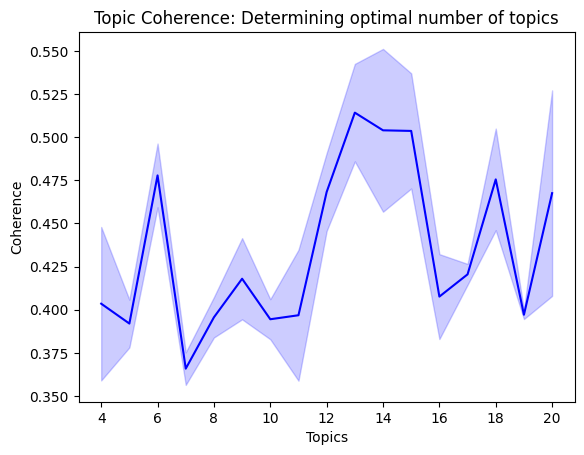

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 14)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
300,300,75% Corpus,14,0.01,0.01,0.396866
301,301,75% Corpus,14,0.01,0.31,0.376505
302,302,75% Corpus,14,0.01,0.61,0.401385
303,303,75% Corpus,14,0.01,0.91,0.396666
304,304,75% Corpus,14,0.01,symmetric,0.371291
305,305,75% Corpus,14,0.31,0.01,0.419824
306,306,75% Corpus,14,0.31,0.31,0.372199
307,307,75% Corpus,14,0.31,0.61,0.388571
308,308,75% Corpus,14,0.31,0.91,0.404650
309,309,75% Corpus,14,0.31,symmetric,0.400771


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     839
Validation_Set    100% Corpus
Topics                     14
Alpha              asymmetric
Beta                symmetric
Coherence            0.551173
Name: 839, dtype: object

In [ ]:
num_topics = 14

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='asymmetric',
                                           eta='symmetric')

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.044*"carne" + 0.026*"humano" + 0.016*"encontrar" + 0.015*"restaurante" + '
  '0.011*"usar" + 0.010*"conhecer" + 0.010*"fabricar" + 0.010*"enchimento" + '
  '0.008*"acabar" + 0.007*"acordo"'),
 (1,
  '0.017*"estudante" + 0.013*"falso" + 0.013*"tirar" + 0.010*"cama" + '
  '0.010*"verdade" + 0.009*"pobre" + 0.009*"escandalo" + 0.009*"diabo" + '
  '0.008*"profissional" + 0.008*"foco"'),
 (2,
  '0.017*"brasilia" + 0.016*"loterico" + 0.014*"falar" + 0.013*"precisar" + '
  '0.012*"atencao" + 0.012*"dia" + 0.011*"mega" + 0.011*"premio" + '
  '0.011*"seno" + 0.009*"evitar"'),
 (3,
  '0.020*"errar" + 0.018*"informacao" + 0.017*"apontar" + 0.014*"mercado" + '
  '0.014*"aceitar" + 0.013*"crise" + 0.013*"sociedade" + 0.013*"negro" + '
  '0.013*"economico" + 0.013*"imobiliario"'),
 (4,
  '0.018*"ano" + 0.015*"justica" + 0.014*"verdadeiro" + 0.012*"pai" + '
  '0.012*"soldado" + 0.012*"politicar" + 0.012*"guerra" + 0.012*"banir" + '
  '0.012*"allahu" + 0.012*"cristianismo"'),
 (5,
  '0.008*"

## Método LDA - APLICAÇÃO NO DATASET DE 2016

In [ ]:
df_2016.count()

title                          572
title_norm                     572
message                        529
message_norm                   529
tokens                         572
features                       572
entities                       572
type                           572
source                         555
url_review                     572
message_norm_treatment         499
datetime                       572
message_norm_treatment_ssw     572
message_norm_treatment_ssw2    572
features2                      572
category                       572
dtype: int64

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = df_2016.message_norm_treatment_ssw2.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['bateu', 'filha', 'anos', 'morto', 'cadeia']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['bater', 'filha', 'ano', 'matar', 'cadeia']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"numero" + 0.008*"produto" + 0.007*"frango" + 0.006*"explicar" + '
  '0.006*"pessoa" + 0.005*"encontrar" + 0.005*"adesivo" + 0.005*"campanha" + '
  '0.005*"congresso" + 0.004*"acreditar"'),
 (1,
  '0.011*"arroz" + 0.008*"ficar" + 0.006*"presidente" + 0.006*"professor" + '
  '0.005*"direito" + 0.005*"salario" + 0.005*"pai" + 0.005*"governo" + '
  '0.005*"teste" + 0.005*"repar"'),
 (2,
  '0.013*"crianca" + 0.011*"beber" + 0.011*"ano" + 0.008*"puder" + '
  '0.007*"pegar" + 0.007*"dia" + 0.006*"mandar" + 0.006*"listar" + '
  '0.006*"crianco" + 0.006*"terra"'),
 (3,
  '0.009*"pessoa" + 0.008*"mensagem" + 0.008*"foto" + 0.007*"ficar" + '
  '0.007*"poder" + 0.006*"hoje" + 0.006*"falar" + 0.006*"senhor" + '
  '0.005*"nome" + 0.005*"gente"'),
 (4,
  '0.011*"amarelo" + 0.009*"multa" + 0.007*"bafometro" + 0.007*"corpo" + '
  '0.006*"adolescente" + 0.006*"doacao" + 0.006*"matar" + 0.006*"vermelho" + '
  '0.005*"vinagre" + 0.005*"igreja"'),
 (5,
  '0.010*"temer" + 0.009*"governo" + 0.

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.3595744097154408


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_2016.csv', index=False)
    pbar.close()


  0%|          | 0/1020 [00:22<?, ?it/s]

100%|██████████| 1020/1020 [1:21:38<00:00,  4.80s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_2016.csv')

In [ ]:
check = check[check['Topics']<= 8]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.302089
1,1,75% Corpus,4,0.01,0.31,0.336091
2,2,75% Corpus,4,0.01,0.61,0.345669
3,3,75% Corpus,4,0.01,0.9099999999999999,0.341501
4,4,75% Corpus,4,0.01,symmetric,0.328415
...,...,...,...,...,...,...
295,655,100% Corpus,8,asymmetric,0.01,0.308687
296,656,100% Corpus,8,asymmetric,0.31,0.422355
297,657,100% Corpus,8,asymmetric,0.61,0.424589
298,658,100% Corpus,8,asymmetric,0.9099999999999999,0.429272


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.354850
1,59,59,75% Corpus,5,asymmetric,symmetric,0.342097
2,89,89,75% Corpus,6,asymmetric,symmetric,0.344060
3,119,119,75% Corpus,7,asymmetric,symmetric,0.354398
4,149,149,75% Corpus,8,asymmetric,symmetric,0.364902
5,179,539,100% Corpus,4,asymmetric,symmetric,0.315942
6,209,569,100% Corpus,5,asymmetric,symmetric,0.314999
7,239,599,100% Corpus,6,asymmetric,symmetric,0.321703
8,269,629,100% Corpus,7,asymmetric,symmetric,0.367011
9,299,659,100% Corpus,8,asymmetric,symmetric,0.367020


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   299
index                     659
Validation_Set    100% Corpus
Topics                      8
Alpha              asymmetric
Beta                symmetric
Coherence             0.36702
Name: 9, dtype: object

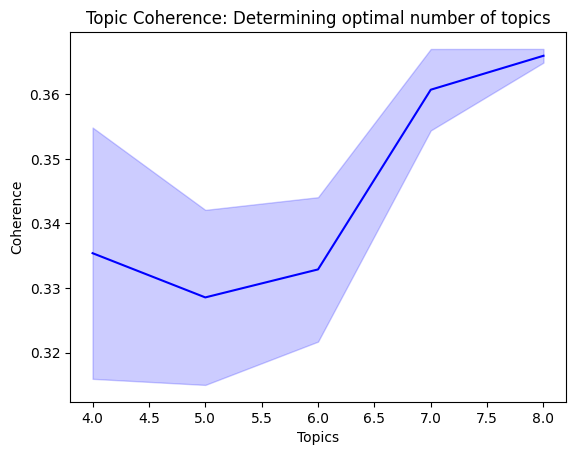

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 8)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
120,120,75% Corpus,8,0.01,0.01,0.369275
121,121,75% Corpus,8,0.01,0.31,0.297502
122,122,75% Corpus,8,0.01,0.61,0.386726
123,123,75% Corpus,8,0.01,0.91,0.409715
124,124,75% Corpus,8,0.01,symmetric,0.338639
125,125,75% Corpus,8,0.31,0.01,0.354274
126,126,75% Corpus,8,0.31,0.31,0.319744
127,127,75% Corpus,8,0.31,0.61,0.351244
128,128,75% Corpus,8,0.31,0.91,0.407435
129,129,75% Corpus,8,0.31,symmetric,0.356894


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     648
Validation_Set    100% Corpus
Topics                      8
Alpha                    0.91
Beta                     0.91
Coherence            0.495278
Name: 288, dtype: object

In [ ]:
num_topics = 8

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.91)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.002*"produto" + 0.002*"adesivo" + 0.001*"indicar" + 0.001*"etiqueta" + '
  '0.001*"numero" + 0.001*"banana" + 0.001*"fruta" + 0.001*"modo" + '
  '0.001*"exemplo" + 0.001*"modificar"'),
 (1,
  '0.005*"governo" + 0.005*"presidente" + 0.004*"brasileiro" + 0.003*"pai" + '
  '0.003*"temer" + 0.003*"nacional" + 0.003*"novo" + 0.003*"programa" + '
  '0.003*"publicar" + 0.002*"federal"'),
 (2,
  '0.003*"frango" + 0.002*"carne" + 0.001*"deslizamento" + 0.001*"adicionar" + '
  '0.001*"livro" + 0.001*"arsenico" + 0.001*"ilha" + 0.001*"comer" + '
  '0.001*"nitro" + 0.001*"olho"'),
 (3,
  '0.007*"pessoa" + 0.006*"ficar" + 0.005*"passar" + 0.004*"gente" + '
  '0.004*"saber" + 0.004*"hoje" + 0.004*"falar" + 0.004*"casa" + '
  '0.004*"querer" + 0.004*"chegar"'),
 (4,
  '0.001*"igreja" + 0.001*"visita" + 0.001*"cabra" + 0.001*"congregacao" + '
  '0.001*"papa" + 0.001*"denominacao" + 0.000*"agredir" + 0.000*"crista" + '
  '0.000*"dello" + 0.000*"outubro"'),
 (5,
  '0.002*"bafometro" + 0.001*"v

## Método LDA - APLICAÇÃO NO DATASET DE 2017

In [ ]:
df_2017.count()

title                          739
title_norm                     739
message                        725
message_norm                   725
tokens                         739
features                       739
entities                       739
type                           739
source                         734
url_review                     739
message_norm_treatment         492
datetime                       739
message_norm_treatment_ssw     739
message_norm_treatment_ssw2    739
features2                      739
category                       739
dtype: int64

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = df_2017.message_norm_treatment_ssw2.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['madrugada', 'fallecio', 'cesar', 'millan', 'encantador', 'encuentra', 'mundo', 'tras', 'noticia', 'dejado', 'paralizados', 'manana', 'quedo', 'oficialmente', 'confirmada', 'diversos', 'medios', 'comunicacion', 'muerte', 'famoso', 'encantador', 'perros', 'cesar', 'millan', 'quien', 'fallecio', 'madrugada', 'ayer', 'tras', 'sufrir']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['madrugada', 'encantador', 'encuentrar', 'Mundo', 'tras', 'noticiar', 'dejar', 'paralizar', 'Manana', 'quedo', 'oficialmente', 'confirmar', 'medio', 'muerte', 'famoso', 'encantador', 'perro', 'madrugar', 'ayer', 'tras', 'sufrir', 'fulminate', 'paro', 'cardiaco', 'interior', 'domicilio', 'ano', 'quien', 'hiciera', 'famoso']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 2), (27, 1), (28, 1), (29, 1)]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.025*"ganhar" + 0.012*"deputado" + 0.011*"recarga" + 0.010*"Gratis" + '
  '0.009*"dar" + 0.008*"agridir" + 0.007*"entrevista" + 0.007*"policial" + '
  '0.007*"faca" + 0.007*"flor"'),
 (1,
  '0.012*"falar" + 0.011*"casa" + 0.010*"ano" + 0.010*"saber" + 0.009*"passar" '
  '+ 0.009*"vida" + 0.008*"hoje" + 0.008*"pessoa" + 0.007*"acontecer" + '
  '0.006*"carro"'),
 (2,
  '0.006*"transmitir" + 0.006*"dia" + 0.006*"pessoa" + 0.006*"passar" + '
  '0.006*"ficar" + 0.005*"repelente" + 0.005*"bacter" + 0.005*"falar" + '
  '0.005*"gente" + 0.005*"contato"'),
 (3,
  '0.014*"chorar" + 0.013*"mulher" + 0.009*"homem" + 0.009*"bandido" + '
  '0.007*"jovem" + 0.007*"video" + 0.007*"presidente" + 0.007*"colocar" + '
  '0.007*"dormir" + 0.006*"retirar"'),
 (4,
  '0.019*"mensagem" + 0.013*"print_noticia" + 0.010*"apontar" + 0.009*"pedir" '
  '+ 0.009*"pessoa" + 0.009*"contato" + 0.006*"pagar" + 0.006*"compartilhar" + '
  '0.006*"virus" + 0.006*"celular"'),
 (5,
  '0.009*"ano" + 0.008*"mundo" + 0.

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.44459981018893935


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_2017.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [1:26:51<00:00,  5.11s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_2017.csv')

In [ ]:
check = check[check['Topics']<= 8]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.346332
1,1,75% Corpus,4,0.01,0.31,0.332262
2,2,75% Corpus,4,0.01,0.61,0.341008
3,3,75% Corpus,4,0.01,0.9099999999999999,0.355967
4,4,75% Corpus,4,0.01,symmetric,0.343042
...,...,...,...,...,...,...
295,655,100% Corpus,8,asymmetric,0.01,0.364302
296,656,100% Corpus,8,asymmetric,0.31,0.468011
297,657,100% Corpus,8,asymmetric,0.61,0.437104
298,658,100% Corpus,8,asymmetric,0.9099999999999999,0.396618


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.306705
1,59,59,75% Corpus,5,asymmetric,symmetric,0.287915
2,89,89,75% Corpus,6,asymmetric,symmetric,0.373888
3,119,119,75% Corpus,7,asymmetric,symmetric,0.381528
4,149,149,75% Corpus,8,asymmetric,symmetric,0.365286
5,179,539,100% Corpus,4,asymmetric,symmetric,0.340570
6,209,569,100% Corpus,5,asymmetric,symmetric,0.407734
7,239,599,100% Corpus,6,asymmetric,symmetric,0.442034
8,269,629,100% Corpus,7,asymmetric,symmetric,0.453051
9,299,659,100% Corpus,8,asymmetric,symmetric,0.426753


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   269
index                     629
Validation_Set    100% Corpus
Topics                      7
Alpha              asymmetric
Beta                symmetric
Coherence            0.453051
Name: 8, dtype: object

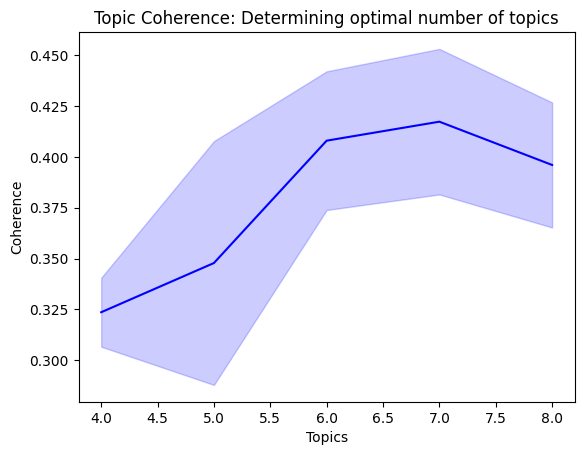

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 7)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
90,90,75% Corpus,7,0.01,0.01,0.310975
91,91,75% Corpus,7,0.01,0.31,0.376671
92,92,75% Corpus,7,0.01,0.61,0.399259
93,93,75% Corpus,7,0.01,0.91,0.439797
94,94,75% Corpus,7,0.01,symmetric,0.359841
95,95,75% Corpus,7,0.31,0.01,0.310710
96,96,75% Corpus,7,0.31,0.31,0.377330
97,97,75% Corpus,7,0.31,0.61,0.405689
98,98,75% Corpus,7,0.31,0.91,0.446100
99,99,75% Corpus,7,0.31,symmetric,0.390417


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     627
Validation_Set    100% Corpus
Topics                      7
Alpha              asymmetric
Beta                     0.61
Coherence            0.480229
Name: 267, dtype: object

In [ ]:
num_topics = 7

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='asymmetric',
                                           eta=0.61)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"ano" + 0.004*"passar" + 0.004*"pessoa" + 0.004*"saber" + '
  '0.004*"mensagem" + 0.004*"falar" + 0.004*"amigo" + 0.004*"pedir" + '
  '0.004*"chegar" + 0.004*"homem"'),
 (1,
  '0.004*"falar" + 0.004*"site" + 0.003*"achar" + 0.003*"hoje" + 0.003*"casa" '
  '+ 0.003*"pessoa" + 0.003*"globo" + 0.003*"saber" + 0.003*"virar" + '
  '0.003*"pedir"'),
 (2,
  '0.003*"ano" + 0.003*"idoso" + 0.002*"vaga" + 0.002*"show" + 0.002*"premio" '
  '+ 0.002*"liberar" + 0.002*"cacau" + 0.002*"passagem" + 0.002*"plastico" + '
  '0.001*"gritar"'),
 (3,
  '0.002*"vender" + 0.002*"julgamento" + 0.002*"imposto" + '
  '0.001*"manifestante" + 0.001*"propagandar" + 0.001*"multa" + '
  '0.001*"politico" + 0.001*"embraer" + 0.001*"bono" + 0.001*"criticar"'),
 (4,
  '0.003*"recarga" + 0.003*"Gratis" + 0.003*"projeto" + 0.002*"ganhar" + '
  '0.002*"general" + 0.002*"criar" + 0.002*"tabu" + 0.002*"print_noticia" + '
  '0.002*"realizar" + 0.002*"feliciano"'),
 (5,
  '0.003*"precisamos_santo" + 0.002*"novo"

## Método LDA - APLICAÇÃO NO DATASET DE 2018

In [ ]:
df_2018.count()

title                          1034
title_norm                     1034
message                         792
message_norm                    791
tokens                         1034
features                       1034
entities                       1034
type                           1034
source                         1031
url_review                     1034
message_norm_treatment          682
datetime                       1034
message_norm_treatment_ssw     1034
message_norm_treatment_ssw2    1034
features2                      1034
category                       1034
dtype: int64

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = df_2018.message_norm_treatment_ssw2.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['doria', 'cancela', 'homenagem', 'dona', 'marisa', 'viaduto', 'nome', 'professora', 'heley']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['dorio', 'cancelar', 'homenagem', 'viaduto', 'nome', 'professora']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.029*"medico" + 0.015*"cantor" + 0.014*"ajudar" + 0.014*"vida" + '
  '0.012*"cubano" + 0.011*"verdade" + 0.010*"casa" + 0.009*"natal" + '
  '0.009*"apenas" + 0.008*"cesta"'),
 (1,
  '0.013*"vizinho" + 0.010*"dia" + 0.010*"gostar" + 0.010*"mulher" + '
  '0.009*"conseguir" + 0.009*"descobrir" + 0.008*"engravidar" + '
  '0.008*"urgente" + 0.008*"chance" + 0.008*"partir"'),
 (2,
  '0.013*"mulher" + 0.013*"senador" + 0.012*"federal" + 0.012*"momento" + '
  '0.012*"caso" + 0.010*"numero" + 0.009*"aparecer" + 0.008*"governo" + '
  '0.008*"social" + 0.008*"ministro"'),
 (3,
  '0.010*"saber" + 0.009*"deixar" + 0.009*"ano" + 0.009*"passar" + '
  '0.009*"vida" + 0.008*"pai" + 0.008*"ficar" + 0.008*"querer" + '
  '0.008*"pessoa" + 0.007*"novo"'),
 (4,
  '0.076*"bolsonaro" + 0.014*"brasileiro" + 0.014*"globo" + 0.013*"candidato" '
  '+ 0.012*"russo" + 0.011*"programa" + 0.010*"presidente" + 0.010*"faca" + '
  '0.007*"estar" + 0.006*"atentado"'),
 (5,
  '0.017*"receber" + 0.012*"homem" + 0.

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4144594342403778


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_2018.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [1:44:56<00:00,  6.17s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_2018.csv')

In [ ]:
check = check[check['Topics']<= 6]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.365861
1,1,75% Corpus,4,0.01,0.31,0.436568
2,2,75% Corpus,4,0.01,0.61,0.422308
3,3,75% Corpus,4,0.01,0.9099999999999999,0.474546
4,4,75% Corpus,4,0.01,symmetric,0.350721
...,...,...,...,...,...,...
175,595,100% Corpus,6,asymmetric,0.01,0.378109
176,596,100% Corpus,6,asymmetric,0.31,0.465396
177,597,100% Corpus,6,asymmetric,0.61,0.417123
178,598,100% Corpus,6,asymmetric,0.9099999999999999,0.467708


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.372341
1,59,59,75% Corpus,5,asymmetric,symmetric,0.396952
2,89,89,75% Corpus,6,asymmetric,symmetric,0.352805
3,119,539,100% Corpus,4,asymmetric,symmetric,0.323881
4,149,569,100% Corpus,5,asymmetric,symmetric,0.366007
5,179,599,100% Corpus,6,asymmetric,symmetric,0.387753


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   59
index                     59
Validation_Set    75% Corpus
Topics                     5
Alpha             asymmetric
Beta               symmetric
Coherence           0.396952
Name: 1, dtype: object

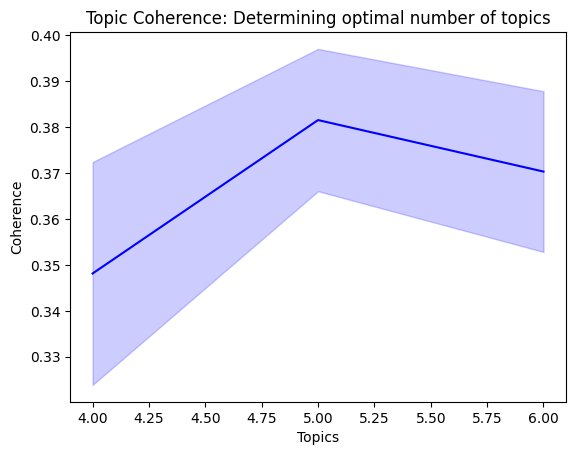

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 5)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
30,30,75% Corpus,5,0.01,0.01,0.358768
31,31,75% Corpus,5,0.01,0.31,0.387545
32,32,75% Corpus,5,0.01,0.61,0.434334
33,33,75% Corpus,5,0.01,0.91,0.401666
34,34,75% Corpus,5,0.01,symmetric,0.363346
35,35,75% Corpus,5,0.31,0.01,0.342350
36,36,75% Corpus,5,0.31,0.31,0.397555
37,37,75% Corpus,5,0.31,0.61,0.479260
38,38,75% Corpus,5,0.31,0.91,0.490907
39,39,75% Corpus,5,0.31,symmetric,0.386613


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     53
Validation_Set    75% Corpus
Topics                     5
Alpha              symmetric
Beta                    0.91
Coherence           0.517275
Name: 53, dtype: object

In [ ]:
num_topics = 5

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           eta=0.91)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"receber" + 0.005*"bolsonaro" + 0.004*"presidente" + 0.004*"ano" + '
  '0.004*"ganhar" + 0.003*"governo" + 0.003*"federal" + 0.003*"site" + '
  '0.003*"acabar" + 0.003*"beneficio"'),
 (1,
  '0.008*"bolsonaro" + 0.005*"brasileiro" + 0.004*"russo" + 0.004*"apoio" + '
  '0.003*"presidente" + 0.003*"maduro" + 0.002*"natal" + 0.002*"imigrante" + '
  '0.002*"espaco" + 0.002*"indulto"'),
 (2,
  '0.006*"mulher" + 0.005*"video" + 0.005*"federal" + 0.004*"vizinho" + '
  '0.004*"senador" + 0.004*"mostrar" + 0.003*"oferecer" + 0.003*"caso" + '
  '0.003*"engravidar" + 0.003*"condenar"'),
 (3,
  '0.006*"bolsonaro" + 0.005*"olhar" + 0.005*"ficar" + 0.005*"saber" + '
  '0.004*"pessoa" + 0.004*"querer" + 0.004*"passar" + 0.004*"vida" + '
  '0.004*"novo" + 0.003*"ano"'),
 (4,
  '0.003*"mostrar" + 0.003*"foto" + 0.002*"preco" + 0.002*"banana" + '
  '0.002*"justificar" + 0.001*"paulo_guede" + 0.001*"atestado" + 0.001*"jovem" '
  '+ 0.001*"idoso" + 0.001*"produzir"')]


## Método LDA - APLICAÇÃO NO DATASET DE 2019

In [ ]:
df_2019.count()

title                          878
title_norm                     878
message                        796
message_norm                   783
tokens                         878
features                       878
entities                       878
type                           878
source                         876
url_review                     878
message_norm_treatment         776
datetime                       878
message_norm_treatment_ssw     878
message_norm_treatment_ssw2    878
features2                      878
category                       878
dtype: int64

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = df_2019.message_norm_treatment_ssw2.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['bolsonaro', 'pede', 'eleitores', 'ignorem', 'partidos', 'vermelhos', 'anti', 'brasileiros']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['bolsonaro', 'pedir', 'eleitor', 'ignorar', 'partido', 'vermelho', 'anti', 'brasileiro']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"livro" + 0.008*"estado" + 0.008*"nordeste" + 0.008*"americano" + '
  '0.007*"grande" + 0.006*"bolsonaro" + 0.006*"ver" + 0.006*"poder" + '
  '0.006*"numero" + 0.006*"vejam"'),
 (1,
  '0.012*"olhar" + 0.011*"compartilhar" + 0.010*"site" + 0.010*"pessoa" + '
  '0.009*"abaixo" + 0.008*"abrir" + 0.007*"hoje" + 0.006*"mandar" + '
  '0.006*"mensagem" + 0.006*"grupo"'),
 (2,
  '0.012*"pessoa" + 0.011*"salario" + 0.010*"acontecer" + 0.010*"homem" + '
  '0.009*"falar" + 0.009*"acabar" + 0.009*"saber" + 0.007*"carro" + '
  '0.007*"novo" + 0.007*"ficar"'),
 (3,
  '0.014*"flamengo" + 0.012*"prender" + 0.007*"globo" + 0.007*"ano" + '
  '0.006*"oficial" + 0.006*"presidente" + 0.006*"doar" + 0.006*"ajudar" + '
  '0.005*"grupo" + 0.005*"objetivo"'),
 (4,
  '0.010*"foto" + 0.009*"filho" + 0.008*"novo" + 0.007*"cantor" + '
  '0.006*"mensagem" + 0.006*"investigar" + 0.006*"mostrar" + 0.006*"celular" + '
  '0.006*"passageiro" + 0.005*"pessoa"'),
 (5,
  '0.012*"receber" + 0.007*"abaixo" + 0.

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.3777544236449056


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_2019.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [1:37:15<00:00,  5.72s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_2019.csv')

In [ ]:
check = check[check['Topics']<= 6]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.363943
1,1,75% Corpus,4,0.01,0.31,0.321124
2,2,75% Corpus,4,0.01,0.61,0.376475
3,3,75% Corpus,4,0.01,0.9099999999999999,0.397018
4,4,75% Corpus,4,0.01,symmetric,0.322462
...,...,...,...,...,...,...
175,595,100% Corpus,6,asymmetric,0.01,0.354415
176,596,100% Corpus,6,asymmetric,0.31,0.420254
177,597,100% Corpus,6,asymmetric,0.61,0.412386
178,598,100% Corpus,6,asymmetric,0.9099999999999999,0.442012


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.340117
1,59,59,75% Corpus,5,asymmetric,symmetric,0.395976
2,89,89,75% Corpus,6,asymmetric,symmetric,0.407643
3,119,539,100% Corpus,4,asymmetric,symmetric,0.391142
4,149,569,100% Corpus,5,asymmetric,symmetric,0.380593
5,179,599,100% Corpus,6,asymmetric,symmetric,0.366577


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   89
index                     89
Validation_Set    75% Corpus
Topics                     6
Alpha             asymmetric
Beta               symmetric
Coherence           0.407643
Name: 2, dtype: object

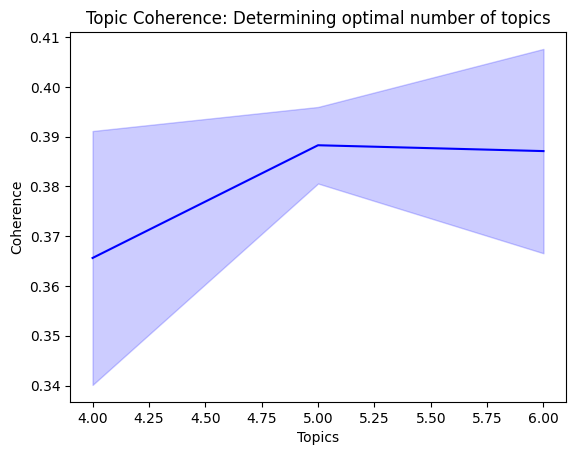

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 6)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
60,60,75% Corpus,6,0.01,0.01,0.358801
61,61,75% Corpus,6,0.01,0.31,0.309855
62,62,75% Corpus,6,0.01,0.61,0.371095
63,63,75% Corpus,6,0.01,0.91,0.441034
64,64,75% Corpus,6,0.01,symmetric,0.305767
65,65,75% Corpus,6,0.31,0.01,0.364266
66,66,75% Corpus,6,0.31,0.31,0.320204
67,67,75% Corpus,6,0.31,0.61,0.359562
68,68,75% Corpus,6,0.31,0.91,0.463164
69,69,75% Corpus,6,0.31,symmetric,0.297009


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     78
Validation_Set    75% Corpus
Topics                     6
Alpha                   0.91
Beta                    0.91
Coherence           0.473558
Name: 78, dtype: object

In [ ]:
num_topics = 6

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.91)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"presidente" + 0.007*"bolsonaro" + 0.004*"brasileiro" + '
  '0.003*"amazonio" + 0.003*"publicar" + 0.003*"livro" + 0.002*"americano" + '
  '0.002*"grande" + 0.002*"terra" + 0.002*"pai"'),
 (1,
  '0.001*"vagabundo" + 0.001*"forjar" + 0.001*"disparo" + 0.001*"fundo" + '
  '0.001*"ataque" + 0.001*"soldado" + 0.001*"prefeito" + 0.001*"lado" + '
  '0.001*"confederar" + 0.001*"amazonico"'),
 (2,
  '0.006*"pessoa" + 0.006*"falar" + 0.004*"ficar" + 0.004*"ano" + '
  '0.004*"querer" + 0.004*"presidente" + 0.004*"hoje" + 0.004*"novo" + '
  '0.003*"pedir" + 0.003*"saber"'),
 (3,
  '0.003*"vaga" + 0.002*"aluno" + 0.002*"ministro" + 0.002*"curso" + '
  '0.001*"plurinacional" + 0.001*"limpeza" + 0.001*"prova" + 0.001*"decretar" '
  '+ 0.001*"estudante" + 0.001*"juiz"'),
 (4,
  '0.008*"site" + 0.007*"abaixo" + 0.005*"ganhar" + 0.005*"compartilhar" + '
  '0.004*"receber" + 0.002*"limite" + 0.002*"compartilhe" + 0.002*"responder" '
  '+ 0.002*"retirar" + 0.002*"amigo"'),
 (5,
  '0.004*"bo

## Método LDA - APLICAÇÃO NO DATASET DE 2020

In [ ]:
df_2020.count()

title                          1162
title_norm                     1162
message                        1144
message_norm                   1112
tokens                         1162
features                       1162
entities                       1162
type                           1162
source                         1162
url_review                     1162
message_norm_treatment         1064
datetime                       1162
message_norm_treatment_ssw     1162
message_norm_treatment_ssw2    1162
features2                      1162
category                       1162
dtype: int64

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = df_2020.message_norm_treatment_ssw2.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['lulinha', 'cpfs', 'cadeia', 'nesse', 'filho', 'puta', 'puta', 'parte', 'receita', 'federal', 'descobre', 'lulinha', 'alterava', 'data', 'nascimento', 'filiacao', 'receita', 'federal', 'descobre', 'lulinha', 'dono', 'alterava', 'filiacao', 'data', 'nascimento']


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['lulinha', 'cpfs', 'cadeia', 'filho', 'puto', 'puto', 'parte', 'receita', 'federal', 'descobrir', 'lulinha', 'alterar', 'data', 'nascimento', 'filiacao', 'receita', 'federal', 'descobrir', 'lulinha', 'dono', 'alterar', 'filiacao', 'data', 'nascimento']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 2), (4, 2), (5, 1), (6, 2), (7, 1), (8, 2), (9, 3), (10, 2), (11, 1), (12, 2), (13, 2)]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.028*"bolsonaro" + 0.015*"voto" + 0.010*"votar" + 0.009*"empresa" + '
  '0.008*"presidente" + 0.008*"brasileiro" + 0.007*"politico" + '
  '0.007*"governo" + 0.006*"lugar" + 0.006*"povo"'),
 (1,
  '0.016*"amigo" + 0.014*"receber" + 0.013*"presente" + 0.012*"novo" + '
  '0.012*"ganhar" + 0.011*"grupo" + 0.010*"compartilhar" + 0.009*"abrir" + '
  '0.008*"abaixo" + 0.008*"dinheiro"'),
 (2,
  '0.014*"pessoa" + 0.013*"virus" + 0.009*"covid" + 0.009*"casa" + '
  '0.009*"mundial" + 0.008*"ficar" + 0.008*"problema" + 0.007*"vida" + '
  '0.007*"dia" + 0.006*"urna"'),
 (3,
  '0.013*"pessoa" + 0.011*"falar" + 0.011*"vacino" + 0.010*"usar" + '
  '0.010*"vacina" + 0.009*"chinês" + 0.008*"saber" + 0.008*"tomar" + '
  '0.008*"querer" + 0.008*"mundo"'),
 (4,
  '0.012*"mensagem" + 0.010*"campanha" + 0.009*"amigo" + 0.008*"participar" + '
  '0.008*"enviar" + 0.008*"conhecer" + 0.007*"partir" + 0.007*"passar" + '
  '0.007*"bom" + 0.007*"hoje"'),
 (5,
  '0.022*"cadastro" + 0.017*"site" + 0.015*"va

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.42804512964066344


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_2020.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [2:05:28<00:00,  7.38s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_2020.csv')

In [ ]:
check = check[check['Topics']<= 6]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.320053
1,1,75% Corpus,4,0.01,0.31,0.295386
2,2,75% Corpus,4,0.01,0.61,0.351590
3,3,75% Corpus,4,0.01,0.9099999999999999,0.385203
4,4,75% Corpus,4,0.01,symmetric,0.288728
...,...,...,...,...,...,...
175,595,100% Corpus,6,asymmetric,0.01,0.361937
176,596,100% Corpus,6,asymmetric,0.31,0.431821
177,597,100% Corpus,6,asymmetric,0.61,0.414242
178,598,100% Corpus,6,asymmetric,0.9099999999999999,0.366357


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.341459
1,59,59,75% Corpus,5,asymmetric,symmetric,0.327090
2,89,89,75% Corpus,6,asymmetric,symmetric,0.369408
3,119,539,100% Corpus,4,asymmetric,symmetric,0.336621
4,149,569,100% Corpus,5,asymmetric,symmetric,0.349856
5,179,599,100% Corpus,6,asymmetric,symmetric,0.384221


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   179
index                     599
Validation_Set    100% Corpus
Topics                      6
Alpha              asymmetric
Beta                symmetric
Coherence            0.384221
Name: 5, dtype: object

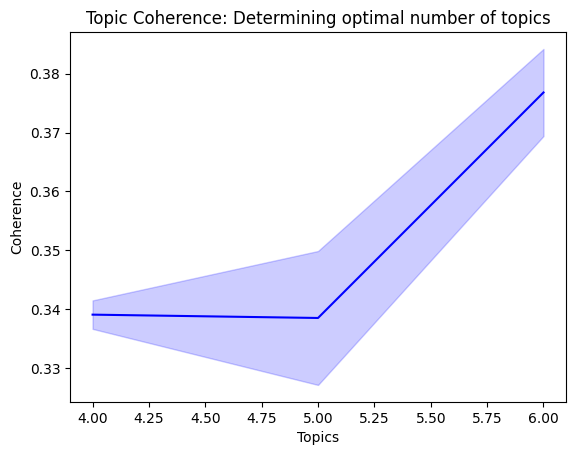

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 6)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
60,60,75% Corpus,6,0.01,0.01,0.333349
61,61,75% Corpus,6,0.01,0.31,0.380061
62,62,75% Corpus,6,0.01,0.61,0.404672
63,63,75% Corpus,6,0.01,0.91,0.428705
64,64,75% Corpus,6,0.01,symmetric,0.362551
65,65,75% Corpus,6,0.31,0.01,0.316446
66,66,75% Corpus,6,0.31,0.31,0.381719
67,67,75% Corpus,6,0.31,0.61,0.411933
68,68,75% Corpus,6,0.31,0.91,0.492905
69,69,75% Corpus,6,0.31,symmetric,0.372145


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     68
Validation_Set    75% Corpus
Topics                     6
Alpha                   0.31
Beta                    0.91
Coherence           0.492905
Name: 68, dtype: object

In [ ]:
num_topics = 6

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.31,
                                           eta=0.91)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.004*"bolsonaro" + 0.003*"urna" + 0.002*"votar" + 0.002*"dono" + '
  '0.002*"ministro" + 0.002*"presidente" + 0.002*"chines" + 0.002*"voto" + '
  '0.002*"acaso" + 0.002*"comando"'),
 (1,
  '0.006*"site" + 0.005*"presente" + 0.005*"ganhar" + 0.005*"receber" + '
  '0.005*"amigo" + 0.004*"valer" + 0.004*"novo" + 0.004*"cadastro" + '
  '0.004*"grupo" + 0.004*"natal"'),
 (2,
  '0.002*"candidato" + 0.002*"testa" + 0.002*"advogado" + 0.002*"perdao" + '
  '0.002*"cliente" + 0.001*"apontar" + 0.001*"chopp" + 0.001*"traicao" + '
  '0.001*"pagamento" + 0.001*"Exposicao"'),
 (3,
  '0.007*"pessoa" + 0.005*"saber" + 0.005*"vacino" + 0.005*"covid" + '
  '0.005*"falar" + 0.004*"tomar" + 0.004*"bolsonaro" + 0.004*"ficar" + '
  '0.004*"ano" + 0.004*"virus"'),
 (4,
  '0.002*"espelho" + 0.001*"foto" + 0.001*"resort" + 0.001*"maravilhoso" + '
  '0.001*"agulha" + 0.001*"praga" + 0.001*"maikelly" + 0.001*"cicatriz" + '
  '0.001*"trecho" + 0.001*"quadro"'),
 (5,
  '0.002*"noel" + 0.001*"chegada" + 0.

## Método LDA - APLICAÇÃO NO DATASET DE 2021

In [ ]:
df_2021.count()

title                          591
title_norm                     591
message                        562
message_norm                   520
tokens                         591
features                       591
entities                       591
type                           591
source                         591
url_review                     591
message_norm_treatment         501
datetime                       591
message_norm_treatment_ssw     591
message_norm_treatment_ssw2    591
features2                      591
category                       591
dtype: int64

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = df_2021.message_norm_treatment_ssw2.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['mario', 'sergio', 'cortella', 'vais', 'andando', 'xicara', 'cafe', 'repente', 'empurra', 'derrames', 'cafe', 'lado', 'derramaste', 'cafe', 'empurrou', 'resposta', 'errada', 'derramaste', 'cafe', 'tinhas', 'cafe', 'caneca', 'terias', 'derramado', 'tiveres', 'xicara', 'derramar', 'portanto', 'vida', 'sacode']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['andar', 'xicara', 'cafe', 'repente', 'empurrar', 'derrame', 'cafe', 'lado', 'derramaste', 'cafe', 'empurrar', 'resposta', 'errar', 'cafe', 'tinhas', 'cafe', 'caneca', 'terias', 'derramar', 'tiver', 'xicara', 'derramar', 'vida', 'sacoder', 'tiver', 'dentro', 'derramar', 'podes', 'vida', 'fingir']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 5), (8, 4), (9, 1), (10, 1), (11, 5), (12, 1), (13, 1), (14, 1), (15, 1), (16, 3), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"novo" + 0.010*"foto" + 0.010*"presente" + 0.009*"cadeia" + '
  '0.008*"ganhar" + 0.008*"voar" + 0.008*"amigo" + 0.007*"equador" + '
  '0.007*"vez" + 0.006*"anticorpo"'),
 (1,
  '0.023*"bolsonaro" + 0.009*"covid" + 0.009*"ficar" + 0.008*"falar" + '
  '0.007*"ministro" + 0.006*"pessoa" + 0.006*"gente" + 0.006*"precisar" + '
  '0.006*"saber" + 0.005*"vacina"'),
 (2,
  '0.018*"mascara" + 0.009*"policia" + 0.008*"verdade" + 0.007*"casamento" + '
  '0.007*"brasileiro" + 0.007*"assumir" + 0.007*"populacao" + 0.006*"jogador" '
  '+ 0.006*"video" + 0.005*"crime"'),
 (3,
  '0.036*"presidente" + 0.014*"bolsonaro" + 0.012*"motoqueiro" + '
  '0.012*"senador" + 0.009*"ministro" + 0.008*"video" + 0.007*"brasileiro" + '
  '0.006*"motocicleta" + 0.006*"merecer" + 0.006*"saber"'),
 (4,
  '0.018*"voto" + 0.014*"covid" + 0.009*"trabalho" + 0.007*"vacinacao" + '
  '0.006*"cientista" + 0.006*"mostrar" + 0.006*"fraude" + 0.006*"tratar" + '
  '0.006*"vacina" + 0.005*"militar"'),
 (5,
  '0.012*"

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.3735778295028345


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_2021.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [1:14:45<00:00,  4.40s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_2021.csv')

In [ ]:
check = check[check['Topics']<= 8]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.296825
1,1,75% Corpus,4,0.01,0.31,0.325809
2,2,75% Corpus,4,0.01,0.61,0.323391
3,3,75% Corpus,4,0.01,0.9099999999999999,0.318546
4,4,75% Corpus,4,0.01,symmetric,0.325700
...,...,...,...,...,...,...
295,655,100% Corpus,8,asymmetric,0.01,0.351568
296,656,100% Corpus,8,asymmetric,0.31,0.365886
297,657,100% Corpus,8,asymmetric,0.61,0.435265
298,658,100% Corpus,8,asymmetric,0.9099999999999999,0.427511


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.324391
1,59,59,75% Corpus,5,asymmetric,symmetric,0.322145
2,89,89,75% Corpus,6,asymmetric,symmetric,0.361935
3,119,119,75% Corpus,7,asymmetric,symmetric,0.333746
4,149,149,75% Corpus,8,asymmetric,symmetric,0.364415
5,179,539,100% Corpus,4,asymmetric,symmetric,0.319918
6,209,569,100% Corpus,5,asymmetric,symmetric,0.357310
7,239,599,100% Corpus,6,asymmetric,symmetric,0.362229
8,269,629,100% Corpus,7,asymmetric,symmetric,0.357019
9,299,659,100% Corpus,8,asymmetric,symmetric,0.364970


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   299
index                     659
Validation_Set    100% Corpus
Topics                      8
Alpha              asymmetric
Beta                symmetric
Coherence             0.36497
Name: 9, dtype: object

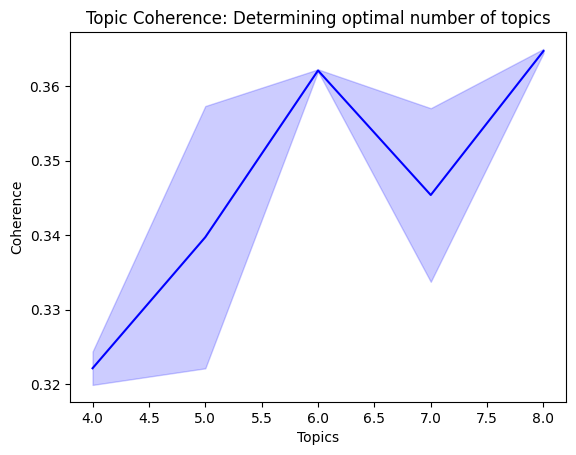

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 8)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
120,120,75% Corpus,8,0.01,0.01,0.354396
121,121,75% Corpus,8,0.01,0.31,0.364487
122,122,75% Corpus,8,0.01,0.61,0.356600
123,123,75% Corpus,8,0.01,0.91,0.452400
124,124,75% Corpus,8,0.01,symmetric,0.392798
125,125,75% Corpus,8,0.31,0.01,0.356104
126,126,75% Corpus,8,0.31,0.31,0.368872
127,127,75% Corpus,8,0.31,0.61,0.374049
128,128,75% Corpus,8,0.31,0.91,0.510862
129,129,75% Corpus,8,0.31,symmetric,0.399992


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                    128
Validation_Set    75% Corpus
Topics                     8
Alpha                   0.31
Beta                    0.91
Coherence           0.510862
Name: 128, dtype: object

In [ ]:
num_topics = 8

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.31,
                                           eta=0.91)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.001*"policial" + 0.001*"argentino" + 0.001*"empresario" + 0.001*"fila" + '
  '0.001*"populacao" + 0.001*"argentina" + 0.001*"pais" + 0.001*"destacar" + '
  '0.001*"promocao" + 0.001*"ganhar"'),
 (1,
  '0.012*"bolsonaro" + 0.009*"presidente" + 0.005*"ministro" + '
  '0.004*"brasileiro" + 0.004*"querer" + 0.004*"mostrar" + 0.003*"ficar" + '
  '0.003*"povo" + 0.003*"saber" + 0.003*"acabar"'),
 (2,
  '0.001*"mascara" + 0.001*"cair" + 0.001*"predio" + 0.001*"motocicleta" + '
  '0.001*"falso" + 0.001*"cura" + 0.001*"derramar" + 0.001*"cafe" + '
  '0.001*"ver" + 0.001*"tamanho"'),
 (3,
  '0.003*"motoqueiro" + 0.003*"senador" + 0.003*"presidente" + 0.001*"assumir" '
  '+ 0.001*"hein" + 0.001*"tecnico" + 0.001*"presidio" + 0.001*"gotinha" + '
  '0.001*"categoria" + 0.001*"doente"'),
 (4,
  '0.001*"empresario" + 0.001*"trabalho" + 0.001*"digital" + 0.001*"prefeito" '
  '+ 0.001*"atividade" + 0.001*"direito_constitucional" + 0.001*"seguir" + '
  '0.001*"produto" + 0.001*"informar" + 0.0

## Método LDA - APLICAÇÃO NO DATASET DE POLÍTICA

In [ ]:
tm_politica.count()

1508

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = tm_politica.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[]


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

[]


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.029*"governador" + 0.023*"cidade" + 0.022*"urna" + 0.020*"sair" + '
  '0.018*"desenvolvedor" + 0.018*"codigo" + 0.018*"fonte" + '
  '0.018*"eletronicas" + 0.018*"provar" + 0.018*"travestis"'),
 (1,
  '0.145*"bolsonaro" + 0.029*"flagrar" + 0.020*"demitir" + 0.014*"fechar" + '
  '0.014*"fraude" + 0.013*"expulsar" + 0.013*"atacar" + 0.013*"reporter" + '
  '0.013*"mascara" + 0.013*"pandemia"'),
 (2,
  '0.135*"vazar" + 0.126*"sozinha" + 0.126*"machucar" + 0.126*"dormer" + '
  '0.011*"criar" + 0.010*"grar" + 0.010*"receber" + 0.008*"damar" + '
  '0.008*"acabar" + 0.008*"tratar"'),
 (3,
  '0.036*"militar" + 0.029*"ministro" + 0.022*"pagar" + 0.021*"deixar" + '
  '0.020*"denunciar" + 0.019*"gafe" + 0.019*"cometer" + 0.017*"erro" + '
  '0.017*"julgamento" + 0.017*"dose"'),
 (4,
  '0.034*"covid" + 0.024*"acabar" + 0.022*"causa" + 0.017*"caixoes" + '
  '0.017*"cova" + 0.017*"empilhar" + 0.009*"reducao" + 0.008*"reeleger" + '
  '0.006*"homem" + 0.006*"macaco"'),
 (5,
  '0.073*"mostrar" +

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.46423086020895454


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_politica.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [46:06<00:00,  2.71s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_politica.csv')

In [ ]:
#check = check[check['Topics']<= 16]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.613317
1,1,75% Corpus,4,0.01,0.31,0.444453
2,2,75% Corpus,4,0.01,0.61,0.368413
3,3,75% Corpus,4,0.01,0.9099999999999999,0.437854
4,4,75% Corpus,4,0.01,symmetric,0.410610
...,...,...,...,...,...,...
1015,1015,100% Corpus,20,asymmetric,0.01,0.521280
1016,1016,100% Corpus,20,asymmetric,0.31,0.333823
1017,1017,100% Corpus,20,asymmetric,0.61,0.314271
1018,1018,100% Corpus,20,asymmetric,0.9099999999999999,0.352102


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.440479
1,59,59,75% Corpus,5,asymmetric,symmetric,0.412286
2,89,89,75% Corpus,6,asymmetric,symmetric,0.459754
3,119,119,75% Corpus,7,asymmetric,symmetric,0.468192
4,149,149,75% Corpus,8,asymmetric,symmetric,0.427577
5,179,179,75% Corpus,9,asymmetric,symmetric,0.404014
6,209,209,75% Corpus,10,asymmetric,symmetric,0.417864
7,239,239,75% Corpus,11,asymmetric,symmetric,0.362306
8,269,269,75% Corpus,12,asymmetric,symmetric,0.427275
9,299,299,75% Corpus,13,asymmetric,symmetric,0.373648


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   539
index                     539
Validation_Set    100% Corpus
Topics                      4
Alpha              asymmetric
Beta                symmetric
Coherence            0.538127
Name: 17, dtype: object

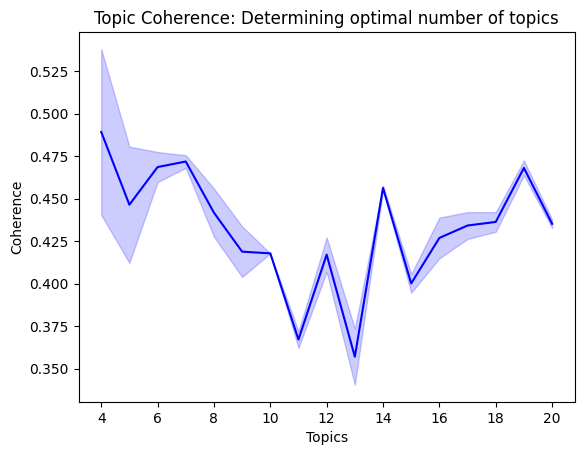

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 4)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.613317
1,1,75% Corpus,4,0.01,0.31,0.444453
2,2,75% Corpus,4,0.01,0.61,0.368413
3,3,75% Corpus,4,0.01,0.91,0.437854
4,4,75% Corpus,4,0.01,symmetric,0.410610
5,5,75% Corpus,4,0.31,0.01,0.640873
6,6,75% Corpus,4,0.31,0.31,0.448447
7,7,75% Corpus,4,0.31,0.61,0.404975
8,8,75% Corpus,4,0.31,0.91,0.400991
9,9,75% Corpus,4,0.31,symmetric,0.469092


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     525
Validation_Set    100% Corpus
Topics                      4
Alpha                    0.91
Beta                     0.01
Coherence            0.661503
Name: 525, dtype: object

In [ ]:
num_topics = 4

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.01)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.126*"presidente" + 0.103*"criar" + 0.076*"moro" + 0.072*"acabar" + '
  '0.058*"governador" + 0.048*"governo" + 0.038*"temer" + 0.038*"sair" + '
  '0.032*"federal" + 0.031*"chorar"'),
 (1,
  '0.444*"bolsonaro" + 0.136*"foto" + 0.066*"grande" + 0.038*"globo" + '
  '0.033*"prender" + 0.030*"pagar" + 0.026*"causa" + 0.025*"fraude" + '
  '0.023*"fotor" + 0.022*"empresa"'),
 (2,
  '0.106*"vazar" + 0.102*"pedir" + 0.091*"militar" + 0.073*"familia" + '
  '0.059*"intervencao" + 0.058*"general" + 0.052*"urna" + 0.048*"matar" + '
  '0.044*"eleicoes" + 0.039*"policia"'),
 (3,
  '0.330*"mostrar" + 0.153*"video" + 0.066*"ministro" + 0.048*"decreto" + '
  '0.045*"deixar" + 0.040*"expulsar" + 0.035*"brasileiro" + 0.031*"aprovar" + '
  '0.022*"deputado" + 0.020*"eleger"')]


## Método LDA - APLICAÇÃO NO DATASET DE BRASIL

In [ ]:
tm_brasil.count()

1013

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = tm_brasil.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['natanael', 'bufalo', 'matou', 'menina', 'anos', 'foragido']


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['natanael', 'bufalo', 'matar', 'menina', 'ano', 'foragido']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.100*"dia" + 0.100*"prever" + 0.095*"proxi" + 0.024*"perder" + '
  '0.018*"caminhoneiro" + 0.016*"procurar" + 0.016*"greve" + 0.014*"sair" + '
  '0.012*"chorar" + 0.012*"matar"'),
 (1,
  '0.045*"morrer" + 0.037*"menina" + 0.015*"cachorro" + 0.014*"desaparecer" + '
  '0.013*"mostrar" + 0.013*"celular" + 0.013*"video" + 0.011*"dono" + '
  '0.011*"civil" + 0.011*"coronavirus"'),
 (2,
  '0.032*"bater" + 0.026*"prender" + 0.019*"cadeia" + 0.016*"botijao" + '
  '0.015*"site" + 0.012*"globo" + 0.010*"juiz" + 0.007*"jornal" + '
  '0.005*"crianco" + 0.005*"convidar"'),
 (3,
  '0.015*"fazer" + 0.015*"carioca" + 0.015*"presidente" + 0.015*"vacinar" + '
  '0.015*"romaria" + 0.015*"promocao" + 0.015*"escolar" + 0.015*"macs" + '
  '0.015*"livro" + 0.015*"derrubar"'),
 (4,
  '0.094*"inss" + 0.091*"aposentado" + 0.091*"pensionista" + 0.091*"aprovar" + '
  '0.016*"menino" + 0.012*"jacarezinho" + 0.012*"ar" + 0.012*"condicionado" + '
  '0.012*"enem" + 0.011*"exploder"'),
 (5,
  '0.026*"crianca"

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4016649144766687


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_brasil.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [37:49<00:00,  2.23s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_brasil.csv')

In [ ]:
#check = check[check['Topics']<= 16]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.544005
1,1,75% Corpus,4,0.01,0.31,0.459341
2,2,75% Corpus,4,0.01,0.61,0.491863
3,3,75% Corpus,4,0.01,0.9099999999999999,0.464433
4,4,75% Corpus,4,0.01,symmetric,0.472038
...,...,...,...,...,...,...
1015,1015,100% Corpus,20,asymmetric,0.01,0.502738
1016,1016,100% Corpus,20,asymmetric,0.31,0.336512
1017,1017,100% Corpus,20,asymmetric,0.61,0.323784
1018,1018,100% Corpus,20,asymmetric,0.9099999999999999,0.335170


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.543083
1,59,59,75% Corpus,5,asymmetric,symmetric,0.503191
2,89,89,75% Corpus,6,asymmetric,symmetric,0.484429
3,119,119,75% Corpus,7,asymmetric,symmetric,0.481704
4,149,149,75% Corpus,8,asymmetric,symmetric,0.459320
5,179,179,75% Corpus,9,asymmetric,symmetric,0.424342
6,209,209,75% Corpus,10,asymmetric,symmetric,0.399441
7,239,239,75% Corpus,11,asymmetric,symmetric,0.395710
8,269,269,75% Corpus,12,asymmetric,symmetric,0.391071
9,299,299,75% Corpus,13,asymmetric,symmetric,0.445089


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   29
index                     29
Validation_Set    75% Corpus
Topics                     4
Alpha             asymmetric
Beta               symmetric
Coherence           0.543083
Name: 0, dtype: object

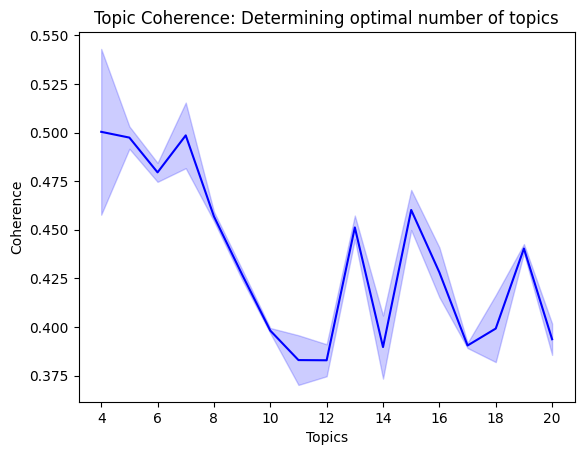

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 4)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.544005
1,1,75% Corpus,4,0.01,0.31,0.459341
2,2,75% Corpus,4,0.01,0.61,0.491863
3,3,75% Corpus,4,0.01,0.91,0.464433
4,4,75% Corpus,4,0.01,symmetric,0.472038
5,5,75% Corpus,4,0.31,0.01,0.554555
6,6,75% Corpus,4,0.31,0.31,0.502981
7,7,75% Corpus,4,0.31,0.61,0.425389
8,8,75% Corpus,4,0.31,0.91,0.431512
9,9,75% Corpus,4,0.31,symmetric,0.474173


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     510
Validation_Set    100% Corpus
Topics                      4
Alpha                    0.01
Beta                     0.01
Coherence            0.603367
Name: 510, dtype: object

In [ ]:
num_topics = 4

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.01)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.120*"ano" + 0.086*"menina" + 0.070*"policia" + 0.052*"greve" + '
  '0.043*"matar" + 0.041*"escola" + 0.039*"causa" + 0.037*"chinês" + '
  '0.031*"desaparecer" + 0.026*"bala"'),
 (1,
  '0.393*"mostrar" + 0.238*"video" + 0.046*"morrer" + 0.027*"matar" + '
  '0.027*"bater" + 0.023*"cobrar" + 0.023*"procurar" + 0.020*"governo" + '
  '0.016*"comemorar" + 0.015*"possivel"'),
 (2,
  '0.330*"dia" + 0.070*"motorista" + 0.049*"multa" + 0.039*"vender" + '
  '0.037*"tomar" + 0.030*"site" + 0.029*"transito" + 0.025*"conta" + '
  '0.023*"globo" + 0.021*"aplicar"'),
 (3,
  '0.266*"foto" + 0.180*"forte" + 0.053*"carro" + 0.047*"bandido" + '
  '0.045*"mulher" + 0.037*"assalto" + 0.035*"pedir" + 0.032*"menino" + '
  '0.029*"prender" + 0.022*"colocar"')]


## Método LDA - APLICAÇÃO NO DATASET DE SAÚDE

In [ ]:
tm_saude.count()

673

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = tm_saude.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[]


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

[]


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.028*"vacino" + 0.028*"alertar" + 0.028*"existir" + 0.020*"mudar" + '
  '0.020*"transforma" + 0.020*"antena" + 0.011*"virus" + 0.009*"comer" + '
  '0.009*"ecstasy" + 0.009*"escola"'),
 (1,
  '0.033*"cura" + 0.031*"vacino" + 0.031*"agua" + 0.030*"funcionar" + '
  '0.026*"alho" + 0.026*"previne" + 0.024*"falar" + 0.023*"cepa" + '
  '0.019*"mistura" + 0.015*"febre"'),
 (2,
  '0.041*"coronavirus" + 0.038*"mostrar" + 0.033*"arma" + 0.033*"testar" + '
  '0.033*"documento" + 0.033*"biologico" + 0.032*"cancer" + 0.026*"vitamina" + '
  '0.023*"novo" + 0.017*"saude"'),
 (3,
  '0.036*"matar" + 0.036*"vacina" + 0.035*"virus" + 0.034*"covid" + '
  '0.032*"populacao" + 0.027*"causa" + 0.023*"reduzir" + 0.023*"morrer" + '
  '0.023*"poder" + 0.017*"chip"'),
 (4,
  '0.077*"vacina" + 0.062*"pessoa" + 0.043*"falso" + 0.026*"agulha" + '
  '0.025*"natural" + 0.020*"seringa" + 0.020*"retratil" + 0.012*"usar" + '
  '0.012*"enxofre" + 0.010*"rato"'),
 (5,
  '0.067*"anunciar" + 0.063*"medico" + 0.023*

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.32752467754322306


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_saude.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [27:44<00:00,  1.63s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_saude.csv')

In [ ]:
check = check[check['Topics']<= 6]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.423728
1,1,75% Corpus,4,0.01,0.31,0.401368
2,2,75% Corpus,4,0.01,0.61,0.307250
3,3,75% Corpus,4,0.01,0.9099999999999999,0.354100
4,4,75% Corpus,4,0.01,symmetric,0.398215
...,...,...,...,...,...,...
175,595,100% Corpus,6,asymmetric,0.01,0.365606
176,596,100% Corpus,6,asymmetric,0.31,0.352732
177,597,100% Corpus,6,asymmetric,0.61,0.308607
178,598,100% Corpus,6,asymmetric,0.9099999999999999,0.312024


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.357571
1,59,59,75% Corpus,5,asymmetric,symmetric,0.390900
2,89,89,75% Corpus,6,asymmetric,symmetric,0.382713
3,119,539,100% Corpus,4,asymmetric,symmetric,0.399426
4,149,569,100% Corpus,5,asymmetric,symmetric,0.387993
5,179,599,100% Corpus,6,asymmetric,symmetric,0.355606


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   119
index                     539
Validation_Set    100% Corpus
Topics                      4
Alpha              asymmetric
Beta                symmetric
Coherence            0.399426
Name: 3, dtype: object

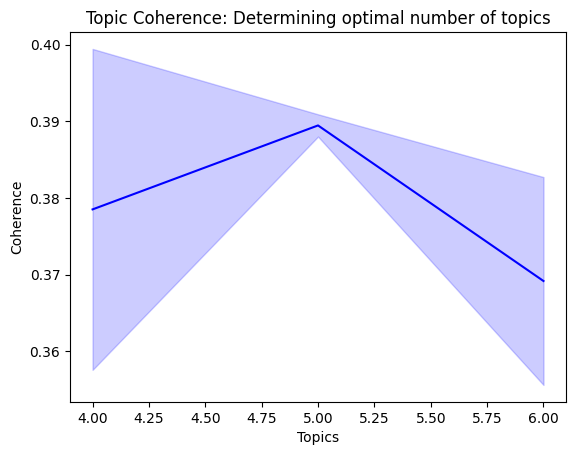

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 4)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.423728
1,1,75% Corpus,4,0.01,0.31,0.401368
2,2,75% Corpus,4,0.01,0.61,0.307250
3,3,75% Corpus,4,0.01,0.91,0.354100
4,4,75% Corpus,4,0.01,symmetric,0.398215
5,5,75% Corpus,4,0.31,0.01,0.442536
6,6,75% Corpus,4,0.31,0.31,0.356560
7,7,75% Corpus,4,0.31,0.61,0.348338
8,8,75% Corpus,4,0.31,0.91,0.344486
9,9,75% Corpus,4,0.31,symmetric,0.360764


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     525
Validation_Set    100% Corpus
Topics                      4
Alpha                    0.91
Beta                     0.01
Coherence            0.496337
Name: 105, dtype: object

In [ ]:
num_topics = 4

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.01)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.173*"vacina" + 0.094*"pessoa" + 0.063*"alertar" + 0.057*"tratamento" + '
  '0.039*"poder" + 0.038*"febre" + 0.037*"agulha" + 0.037*"funcionar" + '
  '0.032*"existir" + 0.029*"amarelo"'),
 (1,
  '0.140*"cura" + 0.106*"coronavirus" + 0.092*"falso" + 0.063*"medico" + '
  '0.057*"matar" + 0.043*"alho" + 0.041*"populacao" + 0.040*"verdade" + '
  '0.032*"agua" + 0.028*"reduzir"'),
 (2,
  '0.219*"vacino" + 0.069*"causar" + 0.068*"anunciar" + 0.059*"video" + '
  '0.042*"novo" + 0.035*"vitamina" + 0.031*"fabricar" + 0.029*"imunidade" + '
  '0.029*"natural" + 0.024*"produto"'),
 (3,
  '0.223*"mostrar" + 0.124*"causa" + 0.069*"foto" + 0.061*"virus" + '
  '0.060*"cancer" + 0.057*"mulher" + 0.035*"Video" + 0.035*"morrer" + '
  '0.023*"coca" + 0.023*"cola"')]


## Método LDA - APLICAÇÃO NO DATASET DE ENTRETENIMENTO

In [ ]:
tm_entretenimento.count()

431

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = tm_entretenimento.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['simpsons', 'episodio', 'manifestacoes', 'brasil']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['simpsons', 'episodio', 'Manifestacoes']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1)]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.035*"cantor" + 0.024*"nacional" + 0.018*"ratinho" + 0.018*"cair" + '
  '0.015*"jornal" + 0.015*"gloria" + 0.015*"apresentadorar" + 0.011*"vazar" + '
  '0.011*"baile" + 0.011*"funk"'),
 (1,
  '0.079*"cantar" + 0.064*"neta" + 0.052*"agnaldo" + 0.052*"junto" + '
  '0.052*"rayol" + 0.025*"ganhar" + 0.024*"novo" + 0.021*"homenagem" + '
  '0.016*"mostrar" + 0.016*"video"'),
 (2,
  '0.137*"flagrar" + 0.054*"pandemia" + 0.054*"festa" + 0.054*"familia" + '
  '0.054*"bastidor" + 0.013*"propagandar" + 0.013*"pai" + 0.013*"natura" + '
  '0.013*"estrelar" + 0.013*"contratar"'),
 (3,
  '0.087*"morrer" + 0.053*"hoje" + 0.049*"pessoa" + 0.038*"vida" + '
  '0.038*"prever" + 0.038*"ficar" + 0.038*"luto" + 0.038*"isolar" + '
  '0.023*"video" + 0.014*"pedir"'),
 (4,
  '0.079*"policia" + 0.069*"morte" + 0.062*"excesso" + 0.062*"questionar" + '
  '0.015*"solicitar" + 0.015*"filho" + 0.015*"emergencial" + 0.015*"auxilio" + '
  '0.015*"receber" + 0.009*"aguo"'),
 (5,
  '0.052*"bolsonaro" + 0.044*"la

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4305336549930986


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_entretenimento.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [23:58<00:00,  1.41s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_entretenimento.csv')

In [ ]:
#check = check[check['Topics']<= 16]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.549978
1,1,75% Corpus,4,0.01,0.31,0.532753
2,2,75% Corpus,4,0.01,0.61,0.521292
3,3,75% Corpus,4,0.01,0.9099999999999999,0.517616
4,4,75% Corpus,4,0.01,symmetric,0.534551
...,...,...,...,...,...,...
1015,1015,100% Corpus,20,asymmetric,0.01,0.493074
1016,1016,100% Corpus,20,asymmetric,0.31,0.487607
1017,1017,100% Corpus,20,asymmetric,0.61,0.484916
1018,1018,100% Corpus,20,asymmetric,0.9099999999999999,0.495390


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.464275
1,59,59,75% Corpus,5,asymmetric,symmetric,0.541274
2,89,89,75% Corpus,6,asymmetric,symmetric,0.533126
3,119,119,75% Corpus,7,asymmetric,symmetric,0.503053
4,149,149,75% Corpus,8,asymmetric,symmetric,0.512859
5,179,179,75% Corpus,9,asymmetric,symmetric,0.489413
6,209,209,75% Corpus,10,asymmetric,symmetric,0.479687
7,239,239,75% Corpus,11,asymmetric,symmetric,0.477455
8,269,269,75% Corpus,12,asymmetric,symmetric,0.478354
9,299,299,75% Corpus,13,asymmetric,symmetric,0.507768


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   59
index                     59
Validation_Set    75% Corpus
Topics                     5
Alpha             asymmetric
Beta               symmetric
Coherence           0.541274
Name: 1, dtype: object

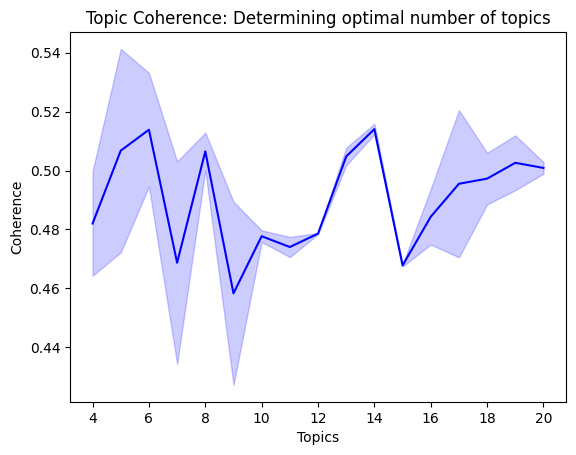

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 5)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
30,30,75% Corpus,5,0.01,0.01,0.514639
31,31,75% Corpus,5,0.01,0.31,0.482077
32,32,75% Corpus,5,0.01,0.61,0.490082
33,33,75% Corpus,5,0.01,0.91,0.492996
34,34,75% Corpus,5,0.01,symmetric,0.495424
35,35,75% Corpus,5,0.31,0.01,0.498245
36,36,75% Corpus,5,0.31,0.31,0.476682
37,37,75% Corpus,5,0.31,0.61,0.480397
38,38,75% Corpus,5,0.31,0.91,0.499550
39,39,75% Corpus,5,0.31,symmetric,0.489564


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     555
Validation_Set    100% Corpus
Topics                      5
Alpha                    0.91
Beta                     0.01
Coherence            0.609054
Name: 555, dtype: object

In [ ]:
num_topics = 5

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.01)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.167*"morrer" + 0.082*"hoje" + 0.069*"vida" + 0.026*"cantor" + '
  '0.025*"nacional" + 0.021*"jogar" + 0.020*"Video" + 0.019*"acidente" + '
  '0.019*"carro" + 0.017*"jornal"'),
 (1,
  '0.074*"cantar" + 0.060*"neta" + 0.057*"flagrar" + 0.056*"musica" + '
  '0.035*"novo" + 0.029*"ganhar" + 0.028*"homem" + 0.026*"video" + '
  '0.025*"homenagem" + 0.023*"pedir"'),
 (2,
  '0.089*"bolsonaro" + 0.068*"politico" + 0.059*"lancar" + 0.053*"presidente" '
  '+ 0.044*"camiseta" + 0.042*"posar" + 0.038*"apoio" + 0.030*"apoiar" + '
  '0.029*"globo" + 0.028*"mulher"'),
 (3,
  '0.094*"pessoa" + 0.090*"receber" + 0.054*"globo" + 0.046*"mostrar" + '
  '0.037*"video" + 0.031*"demitir" + 0.029*"garoto" + 0.029*"vazar" + '
  '0.028*"programa" + 0.019*"apresentar"'),
 (4,
  '0.146*"morte" + 0.091*"flagrar" + 0.084*"policia" + 0.056*"ano" + '
  '0.035*"foto" + 0.032*"circular" + 0.030*"filha" + 0.022*"candidato" + '
  '0.019*"baile" + 0.019*"funk"')]


## Método LDA - APLICAÇÃO NO DATASET DE TECNOLOGIA

In [ ]:
tm_tecnologia.count()

480

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = tm_tecnologia.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['virus', 'homem', 'teste', 'fidelidade', 'descobre', 'mulher', 'lesbica']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['virus', 'homem', 'teste', 'fidelidade', 'descobrir', 'mulher', 'lesbico']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.086*"dar" + 0.048*"site" + 0.031*"flor" + 0.024*"compartilhar" + '
  '0.023*"aniversario" + 0.023*"gratuito" + 0.019*"passagem" + '
  '0.019*"boticario" + 0.019*"emprego" + 0.016*"ingresso"'),
 (1,
  '0.029*"presente" + 0.029*"credito" + 0.025*"influenciador" + '
  '0.025*"pesquisa" + 0.021*"site" + 0.021*"natal" + 0.019*"boticario" + '
  '0.019*"exterior" + 0.019*"digital" + 0.019*"relevancia"'),
 (2,
  '0.056*"facebook" + 0.039*"post" + 0.035*"dinheiro" + 0.029*"mostrar" + '
  '0.028*"prova" + 0.025*"site" + 0.022*"reeleger" + 0.022*"rede" + '
  '0.022*"bolsonaro" + 0.022*"bloquear"'),
 (3,
  '0.035*"mensagem" + 0.033*"social" + 0.024*"compartilhar" + 0.017*"pagar" + '
  '0.017*"cancer" + 0.017*"sangue" + 0.017*"beber" + 0.015*"dia" + '
  '0.015*"amigo" + 0.015*"compartilhe"'),
 (4,
  '0.049*"natal" + 0.033*"celular" + 0.029*"site" + 0.026*"jogo" + '
  '0.022*"batom" + 0.021*"funcionar" + 0.021*"deixar" + 0.021*"ceia" + '
  '0.021*"sadio" + 0.021*"online"'),
 (5,
  '0.088*"

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.42882253209401255


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_tecnologia.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [27:43<00:00,  1.63s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_tecnologia.csv')

In [ ]:
#check = check[check['Topics']<= 16]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.471934
1,1,75% Corpus,4,0.01,0.31,0.446599
2,2,75% Corpus,4,0.01,0.61,0.502761
3,3,75% Corpus,4,0.01,0.9099999999999999,0.508498
4,4,75% Corpus,4,0.01,symmetric,0.473547
...,...,...,...,...,...,...
1015,1015,100% Corpus,20,asymmetric,0.01,0.446656
1016,1016,100% Corpus,20,asymmetric,0.31,0.418035
1017,1017,100% Corpus,20,asymmetric,0.61,0.451941
1018,1018,100% Corpus,20,asymmetric,0.9099999999999999,0.446326


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.365484
1,59,59,75% Corpus,5,asymmetric,symmetric,0.435396
2,89,89,75% Corpus,6,asymmetric,symmetric,0.493303
3,119,119,75% Corpus,7,asymmetric,symmetric,0.432338
4,149,149,75% Corpus,8,asymmetric,symmetric,0.424959
5,179,179,75% Corpus,9,asymmetric,symmetric,0.412102
6,209,209,75% Corpus,10,asymmetric,symmetric,0.417341
7,239,239,75% Corpus,11,asymmetric,symmetric,0.469181
8,269,269,75% Corpus,12,asymmetric,symmetric,0.446074
9,299,299,75% Corpus,13,asymmetric,symmetric,0.464249


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   89
index                     89
Validation_Set    75% Corpus
Topics                     6
Alpha             asymmetric
Beta               symmetric
Coherence           0.493303
Name: 2, dtype: object

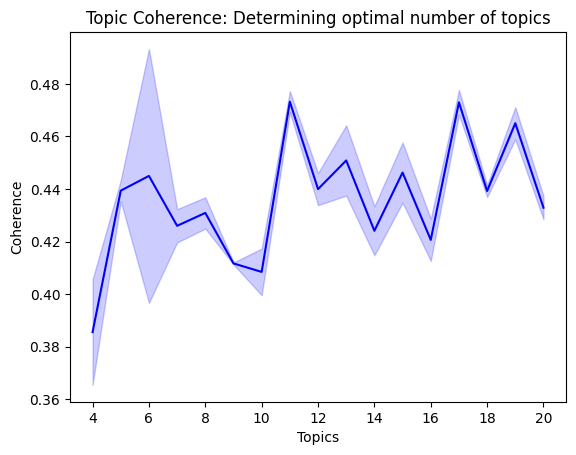

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 6)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
60,60,75% Corpus,6,0.01,0.01,0.443992
61,61,75% Corpus,6,0.01,0.31,0.431107
62,62,75% Corpus,6,0.01,0.61,0.433514
63,63,75% Corpus,6,0.01,0.91,0.434093
64,64,75% Corpus,6,0.01,symmetric,0.435088
65,65,75% Corpus,6,0.31,0.01,0.460403
66,66,75% Corpus,6,0.31,0.31,0.422592
67,67,75% Corpus,6,0.31,0.61,0.425829
68,68,75% Corpus,6,0.31,0.91,0.448059
69,69,75% Corpus,6,0.31,symmetric,0.449721


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     78
Validation_Set    75% Corpus
Topics                     6
Alpha                   0.91
Beta                    0.91
Coherence           0.548199
Name: 78, dtype: object

In [ ]:
num_topics = 6

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.91,
                                           eta=0.91)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.042*"dar" + 0.028*"site" + 0.012*"boticario" + 0.009*"natal" + '
  '0.007*"passagem" + 0.005*"perfume" + 0.005*"Gratis" + 0.005*"gratis" + '
  '0.005*"gratuito" + 0.005*"compartilhar"'),
 (1,
  '0.006*"dar" + 0.004*"boticario" + 0.004*"ganhar" + 0.004*"compartilhar" + '
  '0.004*"site" + 0.004*"virus" + 0.004*"mulher" + 0.004*"natal" + '
  '0.004*"celular" + 0.004*"liberar"'),
 (2,
  '0.007*"ganhar" + 0.005*"foto" + 0.005*"celular" + 0.004*"pedir" + '
  '0.004*"mostrar" + 0.004*"mensagem" + 0.004*"video" + 0.004*"virus" + '
  '0.004*"liberar" + 0.004*"online"'),
 (3,
  '0.019*"facebook" + 0.009*"ganhar" + 0.008*"bloquear" + 0.008*"post" + '
  '0.007*"compartilhar" + 0.006*"foto" + 0.006*"social" + 0.005*"mostrar" + '
  '0.005*"reeleger" + 0.005*"bolsonaro"'),
 (4,
  '0.006*"celular" + 0.005*"mostrar" + 0.005*"credito" + 0.004*"ganhar" + '
  '0.004*"whatsapp" + 0.004*"pedir" + 0.004*"video" + 0.004*"receber" + '
  '0.004*"carro" + 0.004*"mensagem"'),
 (5,
  '0.005*"ganhar" + 0

## Método LDA - APLICAÇÃO NO DATASET DE CIÊNCIA

In [ ]:
tm_ciencia.count()

73

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = tm_ciencia.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['teoria', 'falsa', 'masaru', 'emoto', 'palavras', 'alterar', 'substancias']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['teoria', 'falso', 'Masaru', 'emoto', 'palavra', 'alterar', 'substancia']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.030*"movimento" + 0.030*"ontem" + 0.030*"crosta" + 0.030*"jeito" + '
  '0.030*"descascar" + 0.030*"abacaxi" + 0.030*"certo" + 0.030*"ocorrer" + '
  '0.030*"mao" + 0.030*"gomo"'),
 (1,
  '0.058*"ficar" + 0.058*"russia" + 0.058*"brasileiro" + 0.058*"fisica" + '
  '0.058*"lugar" + 0.058*"marcela" + 0.058*"nuclear" + 0.058*"concurso" + '
  '0.005*"mundo" + 0.005*"mostrar"'),
 (2,
  '0.009*"mostrar" + 0.009*"mundo" + 0.009*"setembro" + 0.009*"cientista" + '
  '0.009*"video" + 0.009*"causa" + 0.009*"foto" + 0.009*"pessoa" + '
  '0.009*"gigante" + 0.009*"ilusao"'),
 (3,
  '0.061*"falso" + 0.061*"Masaru" + 0.061*"substancia" + 0.061*"emoto" + '
  '0.061*"palavra" + 0.061*"teoria" + 0.061*"alterar" + 0.006*"mostrar" + '
  '0.006*"video" + 0.006*"cientista"'),
 (4,
  '0.070*"mostrar" + 0.037*"cientista" + 0.037*"gigante" + 0.037*"interior" + '
  '0.037*"pirassunungo" + 0.037*"escorpioes" + 0.037*"reproduzir" + '
  '0.037*"dentro" + 0.037*"buraco" + 0.037*"berinjela"'),
 (5,
  '0.039*"a

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4517755502324314


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_ciencia.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [14:43<00:00,  1.15it/s]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_ciencia.csv')

In [ ]:
#check = check[check['Topics']<= 16]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.300813
1,1,75% Corpus,4,0.01,0.31,0.366274
2,2,75% Corpus,4,0.01,0.61,0.330653
3,3,75% Corpus,4,0.01,0.9099999999999999,0.277769
4,4,75% Corpus,4,0.01,symmetric,0.374300
...,...,...,...,...,...,...
1015,1015,100% Corpus,20,asymmetric,0.01,0.385216
1016,1016,100% Corpus,20,asymmetric,0.31,0.377461
1017,1017,100% Corpus,20,asymmetric,0.61,0.391451
1018,1018,100% Corpus,20,asymmetric,0.9099999999999999,0.394890


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.442782
1,59,59,75% Corpus,5,asymmetric,symmetric,0.460508
2,89,89,75% Corpus,6,asymmetric,symmetric,0.473938
3,119,119,75% Corpus,7,asymmetric,symmetric,0.476945
4,149,149,75% Corpus,8,asymmetric,symmetric,0.462538
5,179,179,75% Corpus,9,asymmetric,symmetric,0.485097
6,209,209,75% Corpus,10,asymmetric,symmetric,0.470175
7,239,239,75% Corpus,11,asymmetric,symmetric,0.403919
8,269,269,75% Corpus,12,asymmetric,symmetric,0.407705
9,299,299,75% Corpus,13,asymmetric,symmetric,0.430097


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   629
index                     629
Validation_Set    100% Corpus
Topics                      7
Alpha              asymmetric
Beta                symmetric
Coherence            0.509654
Name: 20, dtype: object

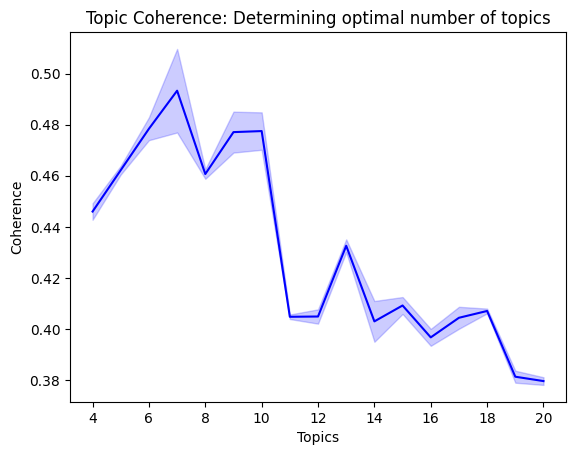

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 7)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
90,90,75% Corpus,7,0.01,0.01,0.359638
91,91,75% Corpus,7,0.01,0.31,0.361766
92,92,75% Corpus,7,0.01,0.61,0.368931
93,93,75% Corpus,7,0.01,0.91,0.385793
94,94,75% Corpus,7,0.01,symmetric,0.371300
95,95,75% Corpus,7,0.31,0.01,0.407698
96,96,75% Corpus,7,0.31,0.31,0.367568
97,97,75% Corpus,7,0.31,0.61,0.411995
98,98,75% Corpus,7,0.31,0.91,0.420730
99,99,75% Corpus,7,0.31,symmetric,0.404932


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     629
Validation_Set    100% Corpus
Topics                      7
Alpha              asymmetric
Beta                symmetric
Coherence            0.509654
Name: 629, dtype: object

In [ ]:
num_topics = 7

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='asymmetric',
                                           eta='symmetric')

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.022*"mostrar" + 0.022*"video" + 0.022*"foto" + 0.022*"causa" + '
  '0.022*"otico" + 0.022*"falso" + 0.022*"ilusao" + 0.022*"pessoa" + '
  '0.022*"cientista" + 0.012*"espaco"'),
 (1,
  '0.031*"gigante" + 0.031*"ficar" + 0.031*"lugar" + 0.031*"russia" + '
  '0.031*"interior" + 0.031*"nuclear" + 0.031*"meteorito" + 0.031*"concurso" + '
  '0.031*"brasileiro" + 0.031*"pirassunungo"'),
 (2,
  '0.051*"maquina" + 0.051*"quantico" + 0.051*"bolinha" + 0.051*"fisico" + '
  '0.051*"cor" + 0.051*"separar" + 0.051*"causa" + 0.006*"mostrar" + '
  '0.006*"mundo" + 0.006*"setembro"'),
 (3,
  '0.009*"mundo" + 0.009*"mostrar" + 0.009*"setembro" + 0.009*"cientista" + '
  '0.009*"video" + 0.009*"gigante" + 0.009*"foto" + 0.009*"causa" + '
  '0.009*"pessoa" + 0.009*"criar"'),
 (4,
  '0.051*"reproduzir" + 0.051*"crescer" + 0.051*"berinjela" + 0.051*"dentro" + '
  '0.051*"escorpioes" + 0.051*"video" + 0.051*"mostrar" + 0.006*"mundo" + '
  '0.006*"cientista" + 0.006*"setembro"'),
 (5,
  '0.047*"cafe"

## Método LDA - APLICAÇÃO NO DATASET DE ESPORTE

In [ ]:
tm_esporte.count()

217

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = tm_esporte.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['virus', 'logotipo', 'copa', 'mundo', 'mensagem', 'subliminar']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['virus', 'logotipo', 'Copa', 'mundo', 'mensagem', 'subliminar']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.076*"time" + 0.052*"premio" + 0.052*"grande" + 0.032*"fazer" + '
  '0.017*"copa" + 0.017*"libertador" + 0.017*"homenagem" + 0.017*"bolsonaro" + '
  '0.017*"atletico" + 0.017*"torcida"'),
 (1,
  '0.058*"sushi" + 0.058*"sopa" + 0.058*"olimpiada" + 0.058*"expulso" + '
  '0.058*"causa" + 0.032*"mostrar" + 0.032*"Video" + 0.029*"perder" + '
  '0.019*"futsal" + 0.019*"gaucho"'),
 (2,
  '0.058*"goleiro" + 0.053*"corinthian" + 0.024*"video" + 0.024*"dar" + '
  '0.024*"roupa" + 0.024*"postar" + 0.024*"mileno" + 0.024*"bemfico" + '
  '0.024*"esposo" + 0.019*"crefisa"'),
 (3,
  '0.018*"jogador" + 0.018*"irregular" + 0.018*"escalar" + 0.018*"cruzeiro" + '
  '0.018*"beneficiar" + 0.018*"tres" + 0.018*"selecaor" + 0.018*"mostrar" + '
  '0.018*"video" + 0.015*"copao"'),
 (4,
  '0.104*"morrer" + 0.057*"ano" + 0.057*"hoje" + 0.033*"Manha" + 0.033*"pele" '
  '+ 0.033*"idade" + 0.027*"anunciar" + 0.027*"casar" + 0.003*"brigar" + '
  '0.003*"detento"'),
 (5,
  '0.063*"colar" + 0.035*"flamengo" +

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4147305580351112


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_esporte.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [21:53<00:00,  1.29s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_esporte.csv')

In [ ]:
#check = check[check['Topics']<= 16]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.384867
1,1,75% Corpus,4,0.01,0.31,0.441438
2,2,75% Corpus,4,0.01,0.61,0.419931
3,3,75% Corpus,4,0.01,0.9099999999999999,0.415006
4,4,75% Corpus,4,0.01,symmetric,0.393366
...,...,...,...,...,...,...
1015,1015,100% Corpus,20,asymmetric,0.01,0.487195
1016,1016,100% Corpus,20,asymmetric,0.31,0.503115
1017,1017,100% Corpus,20,asymmetric,0.61,0.495561
1018,1018,100% Corpus,20,asymmetric,0.9099999999999999,0.502469


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.432187
1,59,59,75% Corpus,5,asymmetric,symmetric,0.527036
2,89,89,75% Corpus,6,asymmetric,symmetric,0.441989
3,119,119,75% Corpus,7,asymmetric,symmetric,0.450498
4,149,149,75% Corpus,8,asymmetric,symmetric,0.476088
5,179,179,75% Corpus,9,asymmetric,symmetric,0.464113
6,209,209,75% Corpus,10,asymmetric,symmetric,0.477283
7,239,239,75% Corpus,11,asymmetric,symmetric,0.482867
8,269,269,75% Corpus,12,asymmetric,symmetric,0.455092
9,299,299,75% Corpus,13,asymmetric,symmetric,0.477218


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   569
index                     569
Validation_Set    100% Corpus
Topics                      5
Alpha              asymmetric
Beta                symmetric
Coherence            0.553634
Name: 18, dtype: object

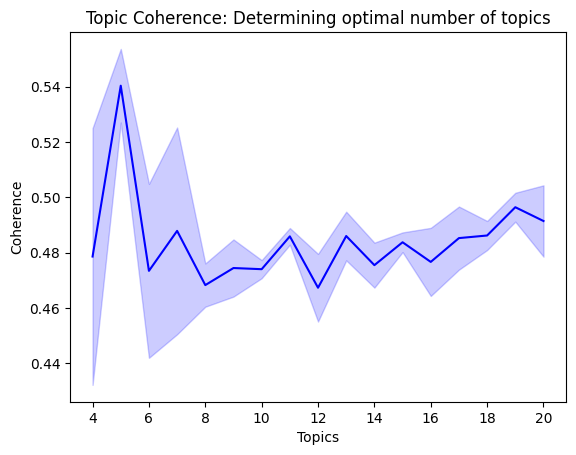

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 4)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.384867
1,1,75% Corpus,4,0.01,0.31,0.441438
2,2,75% Corpus,4,0.01,0.61,0.419931
3,3,75% Corpus,4,0.01,0.91,0.415006
4,4,75% Corpus,4,0.01,symmetric,0.393366
5,5,75% Corpus,4,0.31,0.01,0.379687
6,6,75% Corpus,4,0.31,0.31,0.377695
7,7,75% Corpus,4,0.31,0.61,0.395626
8,8,75% Corpus,4,0.31,0.91,0.372400
9,9,75% Corpus,4,0.31,symmetric,0.383040


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     28
Validation_Set    75% Corpus
Topics                     4
Alpha             asymmetric
Beta                    0.91
Coherence            0.58007
Name: 28, dtype: object

In [ ]:
num_topics = 4

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='asymmetric',
                                           eta=0.91)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.016*"time" + 0.012*"morrer" + 0.012*"premio" + 0.012*"grande" + '
  '0.012*"colar" + 0.012*"flamengo" + 0.011*"goleiro" + 0.010*"selecao" + '
  '0.009*"mostrar" + 0.009*"brasileirao"'),
 (1,
  '0.020*"sopa" + 0.020*"sushi" + 0.020*"olimpiada" + 0.020*"causa" + '
  '0.020*"expulso" + 0.012*"jogador" + 0.011*"copa" + 0.010*"perder" + '
  '0.008*"vaza" + 0.008*"piscinar"'),
 (2,
  '0.008*"temer" + 0.008*"diver" + 0.008*"perdoar" + 0.008*"receita" + '
  '0.008*"federal" + 0.008*"prender" + 0.008*"matar" + 0.008*"humilhar" + '
  '0.008*"neymar" + 0.008*"encontrar"'),
 (3,
  '0.005*"confirmar" + 0.005*"colar" + 0.005*"cigano" + 0.005*"briga" + '
  '0.005*"beijar" + 0.005*"flagrar" + 0.005*"justica" + 0.005*"leiloar" + '
  '0.005*"anunciar" + 0.005*"casar"')]


## Método LDA - APLICAÇÃO NO DATASET DE MUNDO

In [ ]:
tm_mundo.count()

530

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = tm_mundo.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['mentira', 'chineses', 'comem', 'bebes', 'aumentar', 'desempenho']


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['mentira', 'chinês', 'comer', 'bebe', 'aumentar', 'desempenho']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.085*"guerra" + 0.016*"maduro" + 0.015*"vender" + 0.015*"brasileiro" + '
  '0.015*"sir" + 0.011*"papa" + 0.011*"mandar" + 0.011*"apoio" + '
  '0.011*"mensagem" + 0.009*"mulher"'),
 (1,
  '0.074*"mostrar" + 0.066*"foto" + 0.017*"evento" + 0.017*"seguro" + '
  '0.017*"bandeira" + 0.017*"trump" + 0.015*"terrorista" + 0.012*"perigo" + '
  '0.010*"rico" + 0.010*"tesouro"'),
 (2,
  '0.086*"presidente" + 0.057*"prender" + 0.053*"senar" + 0.027*"mostrar" + '
  '0.015*"conspiracao" + 0.015*"teoria" + 0.013*"apresentar" + 0.013*"eleger" '
  '+ 0.013*"biden" + 0.013*"bolsonaro"'),
 (3,
  '0.078*"ficar" + 0.030*"causar" + 0.027*"mostrar" + 0.023*"video" + '
  '0.023*"argentino" + 0.017*"lockdown" + 0.017*"covid" + 0.017*"apedrejar" + '
  '0.017*"policial" + 0.017*"protesto"'),
 (4,
  '0.027*"oceano" + 0.027*"mostrar" + 0.020*"atlantico" + 0.015*"morto" + '
  '0.012*"foto" + 0.012*"azul" + 0.012*"vidro" + 0.012*"tartaruga" + '
  '0.012*"lindo" + 0.012*"viver"'),
 (5,
  '0.054*"comunista" +

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.32304315485793467


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_mundo.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [33:57<00:00,  2.00s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_mundo.csv')

In [ ]:
check = check[check['Topics']<= 6]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.428559
1,1,75% Corpus,4,0.01,0.31,0.440826
2,2,75% Corpus,4,0.01,0.61,0.410192
3,3,75% Corpus,4,0.01,0.9099999999999999,0.399080
4,4,75% Corpus,4,0.01,symmetric,0.422882
...,...,...,...,...,...,...
175,595,100% Corpus,6,asymmetric,0.01,0.447062
176,596,100% Corpus,6,asymmetric,0.31,0.339077
177,597,100% Corpus,6,asymmetric,0.61,0.368679
178,598,100% Corpus,6,asymmetric,0.9099999999999999,0.396295


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.421201
1,59,59,75% Corpus,5,asymmetric,symmetric,0.454441
2,89,89,75% Corpus,6,asymmetric,symmetric,0.438594
3,119,539,100% Corpus,4,asymmetric,symmetric,0.348414
4,149,569,100% Corpus,5,asymmetric,symmetric,0.397353
5,179,599,100% Corpus,6,asymmetric,symmetric,0.343835


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   59
index                     59
Validation_Set    75% Corpus
Topics                     5
Alpha             asymmetric
Beta               symmetric
Coherence           0.454441
Name: 1, dtype: object

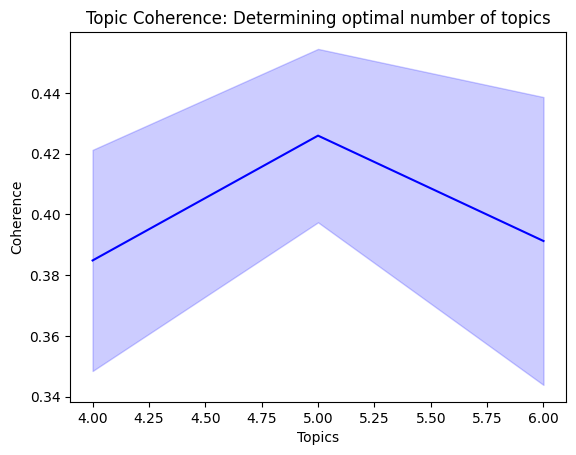

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 5)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
30,30,75% Corpus,5,0.01,0.01,0.340039
31,31,75% Corpus,5,0.01,0.31,0.347000
32,32,75% Corpus,5,0.01,0.61,0.361413
33,33,75% Corpus,5,0.01,0.91,0.402461
34,34,75% Corpus,5,0.01,symmetric,0.353858
35,35,75% Corpus,5,0.31,0.01,0.411842
36,36,75% Corpus,5,0.31,0.31,0.382417
37,37,75% Corpus,5,0.31,0.61,0.361252
38,38,75% Corpus,5,0.31,0.91,0.353160
39,39,75% Corpus,5,0.31,symmetric,0.391802


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     58
Validation_Set    75% Corpus
Topics                     5
Alpha             asymmetric
Beta                    0.91
Coherence           0.511519
Name: 58, dtype: object

In [ ]:
num_topics = 5

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='asymmetric',
                                           eta=0.91)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.037*"mostrar" + 0.023*"video" + 0.017*"foto" + 0.006*"homem" + '
  '0.006*"mulher" + 0.006*"carro" + 0.005*"encontrar" + 0.005*"presidente" + '
  '0.005*"pessoa" + 0.005*"matar"'),
 (1,
  '0.009*"prender" + 0.008*"bolsonaro" + 0.008*"biden" + 0.007*"senar" + '
  '0.005*"terrorista" + 0.005*"amazonio" + 0.005*"cuidar" + 0.005*"bombardear" '
  '+ 0.005*"ameacou" + 0.005*"apresentar"'),
 (2,
  '0.010*"comunista" + 0.008*"trump" + 0.008*"voto" + 0.007*"guerra" + '
  '0.007*"ficar" + 0.007*"armar" + 0.007*"acao" + 0.007*"declarar" + '
  '0.007*"entrar" + 0.007*"socialista"'),
 (3,
  '0.008*"capar" + 0.008*"dizer" + 0.008*"destacar" + 0.008*"time" + '
  '0.007*"pai" + 0.006*"prejudicar" + 0.006*"ajudar" + 0.006*"argentina" + '
  '0.006*"quarentena" + 0.006*"prometer"'),
 (4,
  '0.008*"vazar" + 0.008*"genetico" + 0.008*"fruto" + 0.008*"Mail" + '
  '0.008*"coronavirus" + 0.002*"ministro" + 0.002*"homem" + 0.002*"matar" + '
  '0.002*"pessoa" + 0.002*"presidente"')]


## Método LDA - APLICAÇÃO NO DATASET DE RELIGIÃO

In [ ]:
tm_religiao.count()

245

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = tm_religiao.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

['pastor', 'sergio', 'helder', 'chutou', 'santa', 'virou', 'catolico']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['pastor', 'chutar', 'virar', 'catolico']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.033*"igreja" + 0.033*"catolico" + 0.033*"ficar" + 0.028*"pastor" + '
  '0.020*"mulher" + 0.020*"morte" + 0.020*"culto" + 0.020*"chao" + '
  '0.020*"tetraplegico" + 0.020*"atirar"'),
 (1,
  '0.030*"pastor" + 0.030*"ano" + 0.030*"ontem" + 0.030*"internar" + '
  '0.030*"gospel" + 0.030*"cantor" + 0.030*"Feliciano" + 0.030*"morrer" + '
  '0.030*"alertar" + 0.030*"assassinar"'),
 (2,
  '0.101*"foto" + 0.062*"mostrar" + 0.062*"papar" + 0.049*"flagrar" + '
  '0.049*"rosto" + 0.040*"grupo" + 0.040*"fumar" + 0.040*"morales" + '
  '0.040*"compartilhar" + 0.019*"mundo"'),
 (3,
  '0.065*"morrer" + 0.061*"demonio" + 0.050*"representar" + 0.050*"carbonizar" '
  '+ 0.050*"arrastar" + 0.050*"homem" + 0.017*"oracao" + 0.017*"matar" + '
  '0.017*"nascer" + 0.017*"asa"'),
 (4,
  '0.041*"novo" + 0.041*"besto" + 0.041*"mundial" + 0.041*"ordem" + '
  '0.041*"vir" + 0.041*"marca" + 0.041*"impor" + 0.023*"muculmano" + '
  '0.023*"igreja" + 0.020*"papa"'),
 (5,
  '0.027*"livro" + 0.027*"sir" + 0.027*

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.37154891667288137


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_religiao.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [25:18<00:00,  1.49s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_religiao.csv')

In [ ]:
check = check[check['Topics']<= 8]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.411607
1,1,75% Corpus,4,0.01,0.31,0.401143
2,2,75% Corpus,4,0.01,0.61,0.439792
3,3,75% Corpus,4,0.01,0.9099999999999999,0.447332
4,4,75% Corpus,4,0.01,symmetric,0.422097
...,...,...,...,...,...,...
295,655,100% Corpus,8,asymmetric,0.01,0.418279
296,656,100% Corpus,8,asymmetric,0.31,0.489476
297,657,100% Corpus,8,asymmetric,0.61,0.527610
298,658,100% Corpus,8,asymmetric,0.9099999999999999,0.478055


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.508915
1,59,59,75% Corpus,5,asymmetric,symmetric,0.490104
2,89,89,75% Corpus,6,asymmetric,symmetric,0.499446
3,119,119,75% Corpus,7,asymmetric,symmetric,0.480483
4,149,149,75% Corpus,8,asymmetric,symmetric,0.457188
5,179,539,100% Corpus,4,asymmetric,symmetric,0.459126
6,209,569,100% Corpus,5,asymmetric,symmetric,0.460401
7,239,599,100% Corpus,6,asymmetric,symmetric,0.468466
8,269,629,100% Corpus,7,asymmetric,symmetric,0.497329
9,299,659,100% Corpus,8,asymmetric,symmetric,0.453318


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   29
index                     29
Validation_Set    75% Corpus
Topics                     4
Alpha             asymmetric
Beta               symmetric
Coherence           0.508915
Name: 0, dtype: object

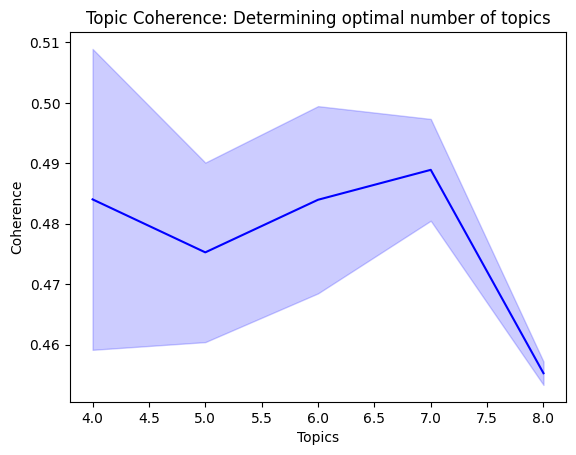

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 4)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.411607
1,1,75% Corpus,4,0.01,0.31,0.401143
2,2,75% Corpus,4,0.01,0.61,0.439792
3,3,75% Corpus,4,0.01,0.91,0.447332
4,4,75% Corpus,4,0.01,symmetric,0.422097
5,5,75% Corpus,4,0.31,0.01,0.404222
6,6,75% Corpus,4,0.31,0.31,0.383187
7,7,75% Corpus,4,0.31,0.61,0.393594
8,8,75% Corpus,4,0.31,0.91,0.390343
9,9,75% Corpus,4,0.31,symmetric,0.383187


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     27
Validation_Set    75% Corpus
Topics                     4
Alpha             asymmetric
Beta                    0.61
Coherence           0.573859
Name: 27, dtype: object

In [ ]:
num_topics = 4

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='asymmetric',
                                           eta=0.61)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.025*"mostrar" + 0.022*"papar" + 0.021*"foto" + 0.019*"morrer" + '
  '0.012*"pastor" + 0.012*"novo" + 0.012*"igreja" + 0.011*"demonio" + '
  '0.011*"flagrar" + 0.011*"rosto"'),
 (1,
  '0.009*"livro" + 0.009*"seculo" + 0.009*"sir" + 0.009*"isaio" + '
  '0.009*"guerra" + 0.009*"previu" + 0.008*"corpo" + 0.008*"globo" + '
  '0.008*"novela" + 0.008*"boicote"'),
 (2,
  '0.009*"criticar" + 0.009*"social" + 0.009*"movimento" + '
  '0.009*"esquizofrenia" + 0.005*"vinda" + 0.005*"simular" + 0.005*"destroir" '
  '+ 0.005*"estatua" + 0.005*"proibir" + 0.005*"temer"'),
 (3,
  '0.005*"simular" + 0.005*"vinda" + 0.005*"estatua" + 0.005*"destroir" + '
  '0.005*"corpo" + 0.005*"querer" + 0.005*"temer" + 0.005*"proibir" + '
  '0.005*"livro" + 0.005*"abrir"')]


## Método LDA - APLICAÇÃO NO DATASET GERAL

In [ ]:
tm_geral.count()

5201

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('portuguese')
def sent_to_words(sentences):
    for sentence in sentences:
        # Remove pontuação deacc=True
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
data = tm_geral.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['simpsons', 'episodio', 'manifestacoes', 'brasil']


In [ ]:
# Construindo os modelos de bigrama e trigrama
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # Quanto maior o limite, menor o número de frases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Maneira mais rápida de obter uma frase batida como um trigrama/bigrama
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
# Removendo as stopwords
data_words_nostops = remove_stopwords(data_words)

# Formando os bigramas
data_words_bigrams = make_bigrams(data_words_nostops)

# Inicializando o modelo spacy 'pt', mantendo apenas o componente tagger (para eficiência)
nlp = spacy.load("pt_core_news_lg", disable=['parser', 'ner'])

# Fazendo lematização mantendo apenas substantivo, adjetivo, verbo e advérbio
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])

['simpsons', 'episodio', 'Manifestacoes']


In [ ]:
import gensim.corpora as corpora

# Criando dicionário
id2word = corpora.Dictionary(data_lemmatized)

# Criando Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Visualizando
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1)]


In [ ]:
# Criando modelo LDA
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [ ]:
from pprint import pprint

# Printando as palavras-chave dos 10 tópicos
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.126*"covid" + 0.046*"causa" + 0.042*"morrer" + 0.027*"mascara" + '
  '0.026*"hoje" + 0.020*"internar" + 0.016*"acabar" + 0.015*"caixoes" + '
  '0.014*"mundo" + 0.013*"estado"'),
 (1,
  '0.127*"mostrar" + 0.065*"foto" + 0.059*"vacino" + 0.033*"falso" + '
  '0.020*"dar" + 0.016*"tese" + 0.014*"social" + 0.014*"comunista" + '
  '0.013*"show" + 0.012*"rede"'),
 (2,
  '0.031*"ganhar" + 0.026*"receber" + 0.021*"fraude" + 0.021*"politico" + '
  '0.020*"carro" + 0.019*"provar" + 0.016*"aparecer" + 0.016*"policial" + '
  '0.015*"lancar" + 0.013*"prender"'),
 (3,
  '0.055*"presidente" + 0.037*"pedir" + 0.024*"doar" + 0.018*"Ministerio" + '
  '0.017*"criar" + 0.017*"posar" + 0.017*"comprar" + 0.016*"hasselmann" + '
  '0.014*"brasileiro" + 0.014*"hospital"'),
 (4,
  '0.092*"video" + 0.037*"pandemia" + 0.037*"lockdown" + 0.037*"vacina" + '
  '0.023*"matar" + 0.020*"causar" + 0.017*"apontar" + 0.014*"aprovar" + '
  '0.013*"fazer" + 0.013*"genetico"'),
 (5,
  '0.027*"virus" + 0.022*"populac

In [ ]:
# Computando valor de coerência
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.5467943747460102


In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Intervalo do número de tópicos
min_topics = 4
max_topics = 21
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Parâmetro alpha
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Parâmetro beta
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Conjuntos de validação
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Execução demorada
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # Itera nos Corpus de validação
    for i in range(len(corpus_sets)):
        # Itera nos números de tópicos
        for k in topics_range:
            # Itera nos valores de alpha
            for a in alpha:
                # Itera nos valores de beta
                for b in beta:
                    # Pegando os valores de coerência para os parâmetros dados
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Salvando os resultados do modelo
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('/content/drive/MyDrive/lda_tuning_results_geral.csv', index=False)
    pbar.close()

100%|██████████| 1020/1020 [2:28:49<00:00,  8.75s/it]


In [ ]:
check = pd.read_csv('/content/drive/MyDrive/lda_tuning_results_geral.csv')

In [ ]:
check = check[check['Topics']<= 6]

In [ ]:
check = check.reset_index()

In [ ]:
check

,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,0,75% Corpus,4,0.01,0.01,0.586418
1,1,75% Corpus,4,0.01,0.31,0.496119
2,2,75% Corpus,4,0.01,0.61,0.438968
3,3,75% Corpus,4,0.01,0.9099999999999999,0.396798
4,4,75% Corpus,4,0.01,symmetric,0.516918
...,...,...,...,...,...,...
175,595,100% Corpus,6,asymmetric,0.01,0.476353
176,596,100% Corpus,6,asymmetric,0.31,0.441002
177,597,100% Corpus,6,asymmetric,0.61,0.365728
178,598,100% Corpus,6,asymmetric,0.9099999999999999,0.382432


In [ ]:
for i in range(0, len(check)):
  if((check['Alpha'][i]!='asymmetric') & (check['Alpha'][i]!='symmetric')):
    check['Alpha'][i]=float(check['Alpha'][i])

In [ ]:
for i in range(0, len(check)):
  if((check['Beta'][i]!='asymmetric') & (check['Beta'][i]!='symmetric')):
    check['Beta'][i]=float(check['Beta'][i])

In [ ]:
check1 = check.loc[(check['Alpha'] == 'asymmetric') & (check['Beta'] == 'symmetric')]

In [ ]:
check1 = check1.reset_index()

In [ ]:
check1

,level_0,index,Validation_Set,Topics,Alpha,Beta,Coherence
0,29,29,75% Corpus,4,asymmetric,symmetric,0.521032
1,59,59,75% Corpus,5,asymmetric,symmetric,0.526573
2,89,89,75% Corpus,6,asymmetric,symmetric,0.519755
3,119,539,100% Corpus,4,asymmetric,symmetric,0.533082
4,149,569,100% Corpus,5,asymmetric,symmetric,0.552455
5,179,599,100% Corpus,6,asymmetric,symmetric,0.502794


In [ ]:
check1.loc[check1['Coherence'].idxmax()]

level_0                   149
index                     569
Validation_Set    100% Corpus
Topics                      5
Alpha              asymmetric
Beta                symmetric
Coherence            0.552455
Name: 4, dtype: object

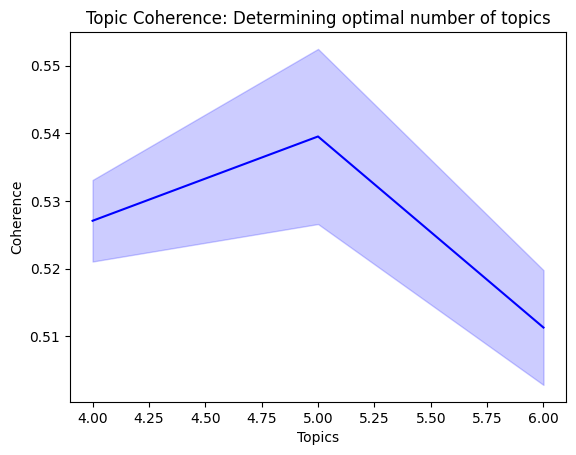

In [ ]:
graf_linha = sns.lineplot(data=check1, x="Topics", y="Coherence", color="blue")
graf_linha.set_title("Topic Coherence: Determining optimal number of topics")
plt.show(graf_linha)

In [ ]:
check2 = check.loc[(check['Topics'] == 5)]

In [ ]:
check2

,index,Validation_Set,Topics,Alpha,Beta,Coherence
30,30,75% Corpus,5,0.01,0.01,0.601985
31,31,75% Corpus,5,0.01,0.31,0.480587
32,32,75% Corpus,5,0.01,0.61,0.448802
33,33,75% Corpus,5,0.01,0.91,0.369324
34,34,75% Corpus,5,0.01,symmetric,0.567323
35,35,75% Corpus,5,0.31,0.01,0.613691
36,36,75% Corpus,5,0.31,0.31,0.523703
37,37,75% Corpus,5,0.31,0.61,0.456545
38,38,75% Corpus,5,0.31,0.91,0.421739
39,39,75% Corpus,5,0.31,symmetric,0.569704


In [ ]:
check2.loc[check2['Coherence'].idxmax()]

index                     35
Validation_Set    75% Corpus
Topics                     5
Alpha                   0.31
Beta                    0.01
Coherence           0.613691
Name: 35, dtype: object

In [ ]:
num_topics = 5

lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.31,
                                           eta=0.01)

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.164*"causa" + 0.126*"ganhar" + 0.090*"anunciar" + 0.062*"lancar" + '
  '0.055*"acabar" + 0.054*"sair" + 0.050*"mundo" + 0.040*"prova" + '
  '0.027*"governador" + 0.026*"livro"'),
 (1,
  '0.282*"mostrar" + 0.144*"foto" + 0.130*"vacino" + 0.067*"morrer" + '
  '0.045*"Video" + 0.039*"vazar" + 0.029*"facebook" + 0.027*"deixar" + '
  '0.023*"prender" + 0.022*"encontrar"'),
 (2,
  '0.130*"presidente" + 0.107*"grande" + 0.070*"ficar" + 0.070*"mulher" + '
  '0.061*"carro" + 0.049*"aparecer" + 0.049*"homem" + 0.046*"cidade" + '
  '0.039*"eleicoes" + 0.032*"brasileiro"'),
 (3,
  '0.832*"novo" + 0.027*"falso" + 0.023*"pessoa" + 0.019*"pedir" + 0.011*"dia" '
  '+ 0.010*"apontar" + 0.008*"virus" + 0.006*"site" + 0.005*"telefone" + '
  '0.005*"enganar"'),
 (4,
  '0.294*"video" + 0.089*"policia" + 0.074*"matar" + 0.064*"globo" + '
  '0.052*"retirar" + 0.044*"tomar" + 0.043*"aprovar" + 0.027*"pagar" + '
  '0.026*"ano" + 0.025*"chinês"')]
